# PXD015122
## AKT but not MYC promotes reactive oxygen species-mediated cell death in oxidative culture
[PRIDE link](https://www.ebi.ac.uk/pride/archive/projects/PXD015122)

[Article link](https://journals.biologists.com/jcs/article/133/7/jcs239277/224851/AKT-but-not-MYC-promotes-reactive-oxygen-species)

In [1]:
#Import libraries
os.chdir("/home/robbe/ionbot/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass
import OxiAnalysis as OA
import importlib
importlib.reload(OA)

<module 'OxiAnalysis' from '/home/robbe/ionbot/OxiAnalysis.py'>

# Analysis without quant data

In [2]:
#first = pd.read_csv("/home/robbe/ionbot/full_projects/PXD015122_first.csv")
first = pd.read_csv("/home/robbe/ionbot/full_projects_/PXD015122/PXD015122_first.csv")
del first["Unnamed: 0"]
del first["spectrum_title"]
del first["scan"]
first['modifications'] = first['modifications'].fillna("None")
first['Oxidant treatment'] = first['Oxidant treatment'].fillna("None")
first['Secondary treatment'] = first['Secondary treatment'].fillna("None")
first['Length of Secondary treatment (mins)'] = first['Length of Secondary treatment (mins)'].fillna(0)
first['Length of Secondary treatment (mins)'] = first['Length of Secondary treatment (mins)'].replace('0', 0)
first['Length of oxidant treatment (mins)'] = first['Length of oxidant treatment (mins)'].replace('0', 0)


/tmp/ipykernel_3838954/106324747.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  first = pd.read_csv("/home/robbe/ionbot/full_projects_/PXD015122/PXD015122_first.csv")


In [3]:
print("The amount of PSMs in this project dataset is: ", first.shape[0])
print("The amount of raw files that make up the master dataset is: ", len(first["spectrum_file"].unique()))

The amount of PSMs in this project dataset is:  481401
The amount of raw files that make up the master dataset is:  36


In [4]:
first['Peptidoform_name'] = first.apply(lambda row: OA.peptidoform_name(row), axis=1)
first['Position'] = first['modifications'].apply(OA.get_positions)
first['Modification'] = first['modifications'].apply(OA.get_modification)
first['Oxidatively_modified'] = first['modifications'].apply(OA.oxidatively_modified)

## Overview of the treatments in this project

### Conditions that will be compared

| N | Treatment | Treatment 2 | Treatment 3|
| - | ----------- | ----------- | -------- |
| 1 | AKT in Glucose | AKT in short-term Galactose | AKT in long-term Galactose |
| 2 | MYC in Glucose | MYC in short-term Galactose | MYC in long-term Galactose |
| 3 | None in Glucose | None in short-term Galactose | None in long-term Galactose |
| 4 | None | AKT | MYC |
| 5 | None in short-term Galactose | AKT in short-term Galactose | MYC in short-term Galactose |
| 6 | None in long-term Galactose | AKT in long-term Galactose | MYC in long-term Galactose |

In [8]:
AKT = first.loc[lambda first: (first["Oxidant treatment"] == "mAKT") & (first["Secondary treatment"] == "None")]
AKTst = first.loc[lambda first: (first["Oxidant treatment"] == "mAKT") & (first["Secondary treatment"] == "Short-term galactose")]
AKTlt = first.loc[lambda first: (first["Oxidant treatment"] == "mAKT") & (first["Secondary treatment"] == "Long-term galactose")]
MYC = first.loc[lambda first: (first["Oxidant treatment"] == "MYC") & (first["Secondary treatment"] == "None")]
MYCst = first.loc[lambda first: (first["Oxidant treatment"] == "MYC") & (first["Secondary treatment"] == "Short-term galactose")]
MYClt = first.loc[lambda first: (first["Oxidant treatment"] == "MYC") & (first["Secondary treatment"] == "Long-term galactose")]
Control = first.loc[lambda first: (first["Oxidant treatment"] == "None") & (first["Secondary treatment"] == "None")]
Controlst = first.loc[lambda first: (first["Oxidant treatment"] == "None") & (first["Secondary treatment"] == "Short-term galactose")]
Controllt = first.loc[lambda first: (first["Oxidant treatment"] == "None") & (first["Secondary treatment"] == "Long-term galactose")]

## Comparison between the treatments
### 1) Constitutively active AKT in three conditions (glucose medium, short-term Galactose medium, long-term Galactose medium)

In [9]:
print("There are this many replicates of AKT treatment: {}".format(AKT["spectrum_file"].nunique()))
print("There are this many replicates of AKTst treatment: {}".format(AKTst["spectrum_file"].nunique()))
print("There are this many replicates of AKTlt treatment: {}".format(AKTlt["spectrum_file"].nunique()))

There are this many replicates of AKT treatment: 4
There are this many replicates of AKTst treatment: 4
There are this many replicates of AKTlt treatment: 4


In [10]:
AKTrep = OA.replicate_filter(AKT,2)
AKTstrep = OA.replicate_filter(AKTst,2)
AKTltrep = OA.replicate_filter(AKTlt,2)

In [11]:
print("The ratio of PSMs that contain an oxidative modification in the AKT treatment subset: {}".format((AKTrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the AKTst treatment subset: {}".format((AKTstrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the AKTlt treatment subset: {}".format((AKTltrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the AKT treatment subset: 2.3522874606408593 %
The ratio of PSMs that contain an oxidative modification in the AKTst treatment subset: 4.151860512216228 %
The ratio of PSMs that contain an oxidative modification in the AKTlt treatment subset: 2.099410837274915 %


In [12]:
mrAKTrep = OA.modratios(AKTrep)
mrAKTstrep = OA.modratios(AKTst)
mrAKTltrep = OA.modratios(AKTlt)

In [13]:
modr_temp = pd.merge(mrAKTltrep, mrAKTstrep, on="Modification", suffixes=('_ltGal', '_stGal'))
modr = pd.merge(modr_temp, mrAKTrep, on="Modification")
modr = modr.rename(columns={'Ratios':'Ratios_Glu'})
modr = modr.drop(modr[(modr["Ratios_ltGal"] == 0) | (modr["Ratios_stGal"] == 0) | (modr["Ratios_Glu"] == 0)].index)
modr

,Modification,Ratios_ltGal,Ratios_stGal,Ratios_Glu
0,[6]Carboxymethyl[K],0.000304,0.000156,0.000040
3,[35]Oxidation[S],0.000246,0.000222,0.000126
4,[35]Oxidation[Q],0.000097,0.000143,0.000092
8,[35]Oxidation[W],0.006219,0.006262,0.012195
12,[35]Oxidation[R],0.000038,0.000050,0.000103
15,[35]Oxidation[F],0.000204,0.000277,0.000287
21,[53]HNE[H],0.000694,0.000200,0.000389
23,[359]Pro->pyro-Glu[P],0.000056,0.000201,0.000160
28,[345]Trioxidation[C],0.002371,0.003335,0.003326
33,[351]Trp->Kynurenin[W],0.001990,0.002236,0.001524


Note about the following graph: here only mods where included which had a non-0 value for all three conditions. This was done because otherwise the graph was very messy. Other projects this is not the case, then mods are included as soon as there is 1 non-0 value.

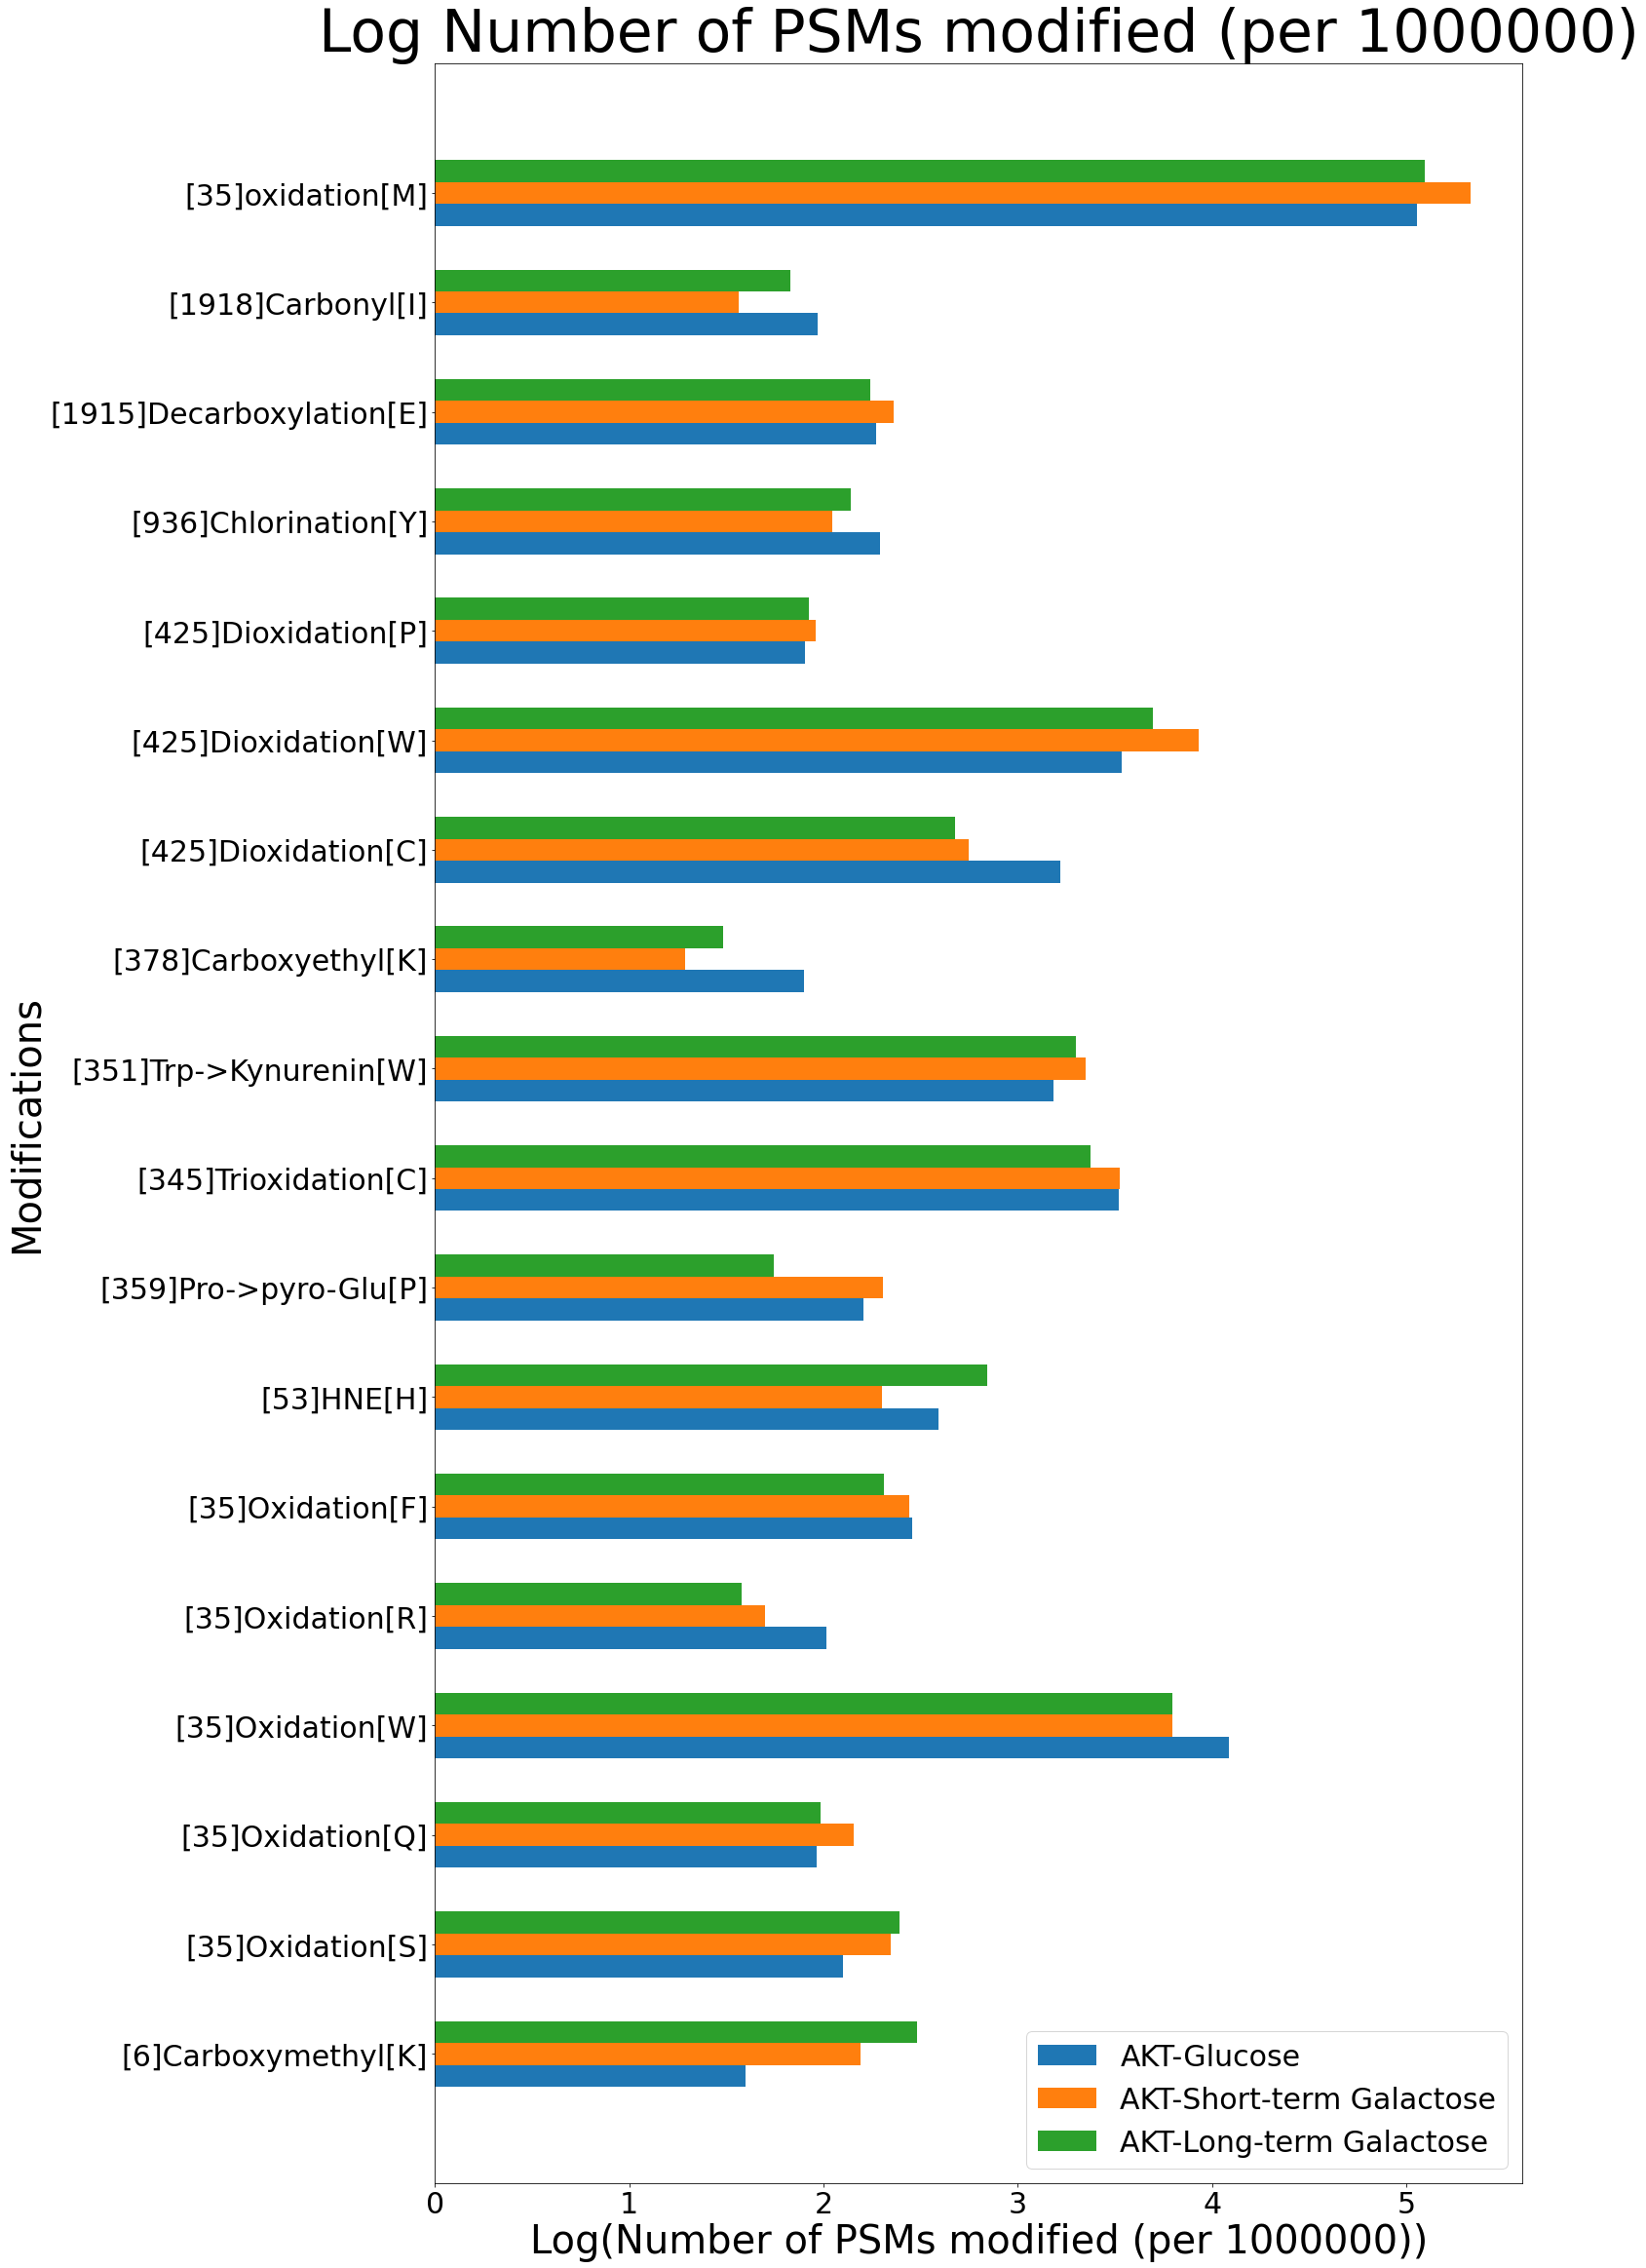

In [14]:
y = modr["Modification"]
xGlu = np.log10(modr['Ratios_Glu']*1000000)
xstGal = np.log10(modr['Ratios_stGal']*1000000)
xltGal = np.log10(modr['Ratios_ltGal']*1000000)
y_axis = np.arange(len(y))
plt.figure(figsize=(20,40))
plt.barh(y_axis - 0.2, xGlu, 0.2, label = 'AKT-Glucose')
plt.barh(y_axis, xstGal, 0.2, label = 'AKT-Short-term Galactose')
plt.barh(y_axis + 0.2, xltGal, 0.2, label = 'AKT-Long-term Galactose')

plt.yticks(y_axis, y)
plt.ylabel("Modifications", fontsize = 40)
plt.xlabel("Log(Number of PSMs modified (per 1000000))", fontsize = 40)
plt.title("Log Number of PSMs modified (per 1000000)", fontsize = 60)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 30)
plt.show()

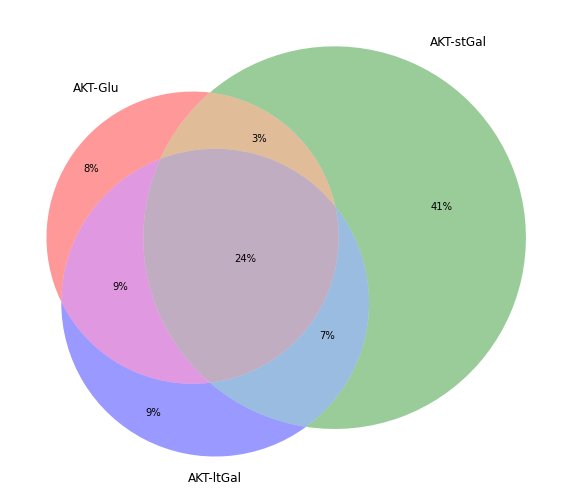

In [15]:
OA.condition_venn([AKTrep,AKTstrep,AKTltrep], ["AKT-Glu", "AKT-stGal", "AKT-ltGal"])

In [16]:
RPMAKT = OA.relative_PSM_modification(AKTrep)
RPMAKTst = OA.relative_PSM_modification(AKTstrep)
RPMAKTlt = OA.relative_PSM_modification(AKTltrep)

In [17]:
RPM = pd.merge(RPMAKT,RPMAKTst, on="Amino acid", suffixes=('_AKT','_AKTst'))
RPM = pd.merge(RPM, RPMAKTlt, on="Amino acid")
RPM = RPM.rename(columns={"Relative level of PSMs containing unmodified residue": "Relative level of PSMs containing unmodified residue_AKTlt"})
RPM

,Amino acid,Relative level of PSMs containing unmodified residue_AKT,Relative level of PSMs containing unmodified residue_AKTst,Relative level of PSMs containing unmodified residue_AKTlt
0,A,0.998725,0.999421,0.998834
1,R,0.998493,0.999329,0.999411
2,N,0.996436,0.996491,0.996789
3,D,0.994873,0.995881,0.994786
4,C,0.014382,0.023148,0.017335
5,Q,0.995195,0.995125,0.994040
6,E,0.998021,0.995888,0.997659
7,G,0.999687,0.999727,0.999726
8,H,0.998934,0.996913,0.998097
9,I,0.999738,0.999629,1.000000


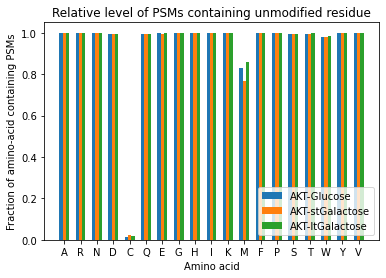

In [18]:
x = RPM["Amino acid"]
xGlu = RPM["Relative level of PSMs containing unmodified residue_AKT"]
xst = RPM['Relative level of PSMs containing unmodified residue_AKTst']
xlt = RPM['Relative level of PSMs containing unmodified residue_AKTlt']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xGlu, 0.2, label = 'AKT-Glucose')
plt.bar(x_axis, xst, 0.2, label = 'AKT-stGalactose')
plt.bar(x_axis + 0.2, xlt, 0.2, label = 'AKT-ltGalactose')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (20,20)
plt.legend(loc="lower right")
plt.show()

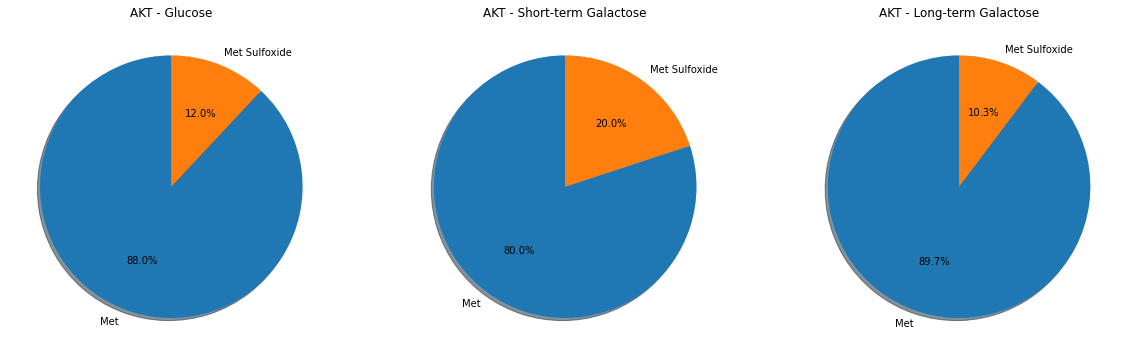

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
OA.methionine_overview(AKTrep, ax1)
OA.methionine_overview(AKTstrep, ax2)
OA.methionine_overview(AKTltrep, ax3)
plt.title("Methionine containing peptides")
ax1.set_title("AKT - Glucose")
ax2.set_title("AKT - Short-term Galactose")
ax3.set_title("AKT - Long-term Galactose")
plt.show()

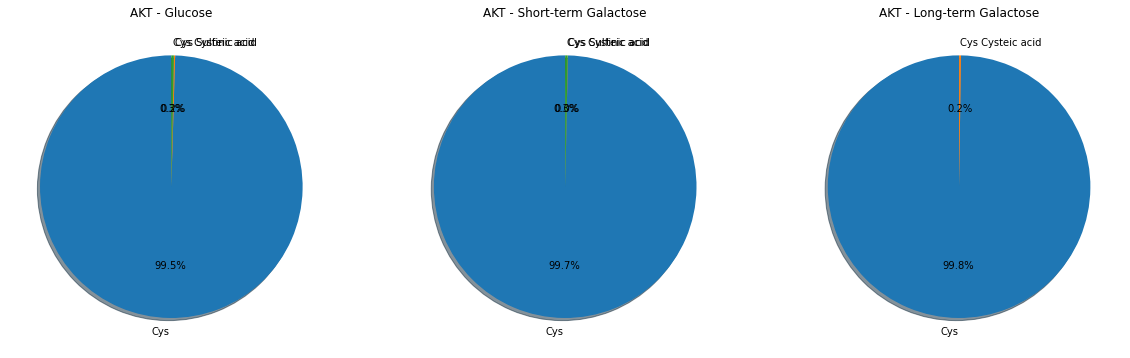

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
OA.cysteine_overview(AKTrep, ax1)
OA.cysteine_overview(AKTstrep, ax2)
OA.cysteine_overview(AKTltrep, ax3)
plt.title("cysteine containing peptides")
ax1.set_title("AKT - Glucose")
ax2.set_title("AKT - Short-term Galactose")
ax3.set_title("AKT - Long-term Galactose")
plt.show()

### 2) Constitutively active MYC in three conditions (Glucose medium, short-term Galactose medium, long-term Galactose medium)

In [21]:
print("There are this many replicates of each treatment: {}".format(MYC["spectrum_file"].nunique()))
print("There are this many replicates of each treatment: {}".format(MYCst["spectrum_file"].nunique()))
print("There are this many replicates of each treatment: {}".format(MYClt["spectrum_file"].nunique()))

There are this many replicates of each treatment: 4
There are this many replicates of each treatment: 4
There are this many replicates of each treatment: 4


In [22]:
MYCrep = OA.replicate_filter(MYC,2)
MYCstrep = OA.replicate_filter(MYCst,2)
MYCltrep = OA.replicate_filter(MYClt,2)

In [23]:
print("The ratio of PSMs that contain an oxidative modification in the MYC treatment subset: {}".format((MYCrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the MYCst treatment subset: {}".format((MYCstrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the MYClt treatment subset: {}".format((MYCltrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the MYC treatment subset: 3.127058861339204 %
The ratio of PSMs that contain an oxidative modification in the MYCst treatment subset: 3.4774729738174095 %
The ratio of PSMs that contain an oxidative modification in the MYClt treatment subset: 3.8436584550655684 %


In [24]:
mrMYCrep = OA.modratios(MYCrep)
mrMYCstrep = OA.modratios(MYCst)
mrMYCltrep = OA.modratios(MYClt)

In [25]:
modr_temp2 = pd.merge(mrMYCltrep, mrMYCstrep, on="Modification", suffixes=('_ltGal', '_stGal'))
modr2 = pd.merge(modr_temp2, mrMYCrep, on="Modification")
modr2 = modr2.rename(columns={'Ratios':'Ratios_Glu'})
modr2 = modr2.drop(modr2[(modr2["Ratios_ltGal"] == 0) | (modr2["Ratios_stGal"] == 0) | (modr2["Ratios_Glu"] == 0)].index)
modr2

,Modification,Ratios_ltGal,Ratios_stGal,Ratios_Glu
0,[6]Carboxymethyl[K],0.000214,0.000418,0.000061
3,[35]Oxidation[S],0.000206,0.000194,0.000109
6,[35]Oxidation[I],0.000439,0.000205,0.000209
8,[35]Oxidation[W],0.008056,0.001302,0.007933
15,[35]Oxidation[F],0.000506,0.000625,0.000249
16,[35]Oxidation[P],0.000111,0.000207,0.000075
17,[35]Oxidation[N],0.000137,0.000265,0.000053
20,[53]HNE[K],0.000175,0.000129,0.000102
23,[359]Pro->pyro-Glu[P],0.000148,0.000355,0.000113
24,[350]Trp->Hydroxykynurenin[W],0.000183,0.000325,0.000159


Note about the following graph: here only mods where included which had a non-0 value for all three conditions. This was done because otherwise the graph was very messy. Other projects this is not the case, then mods are included as soon as there is 1 non-0 value.

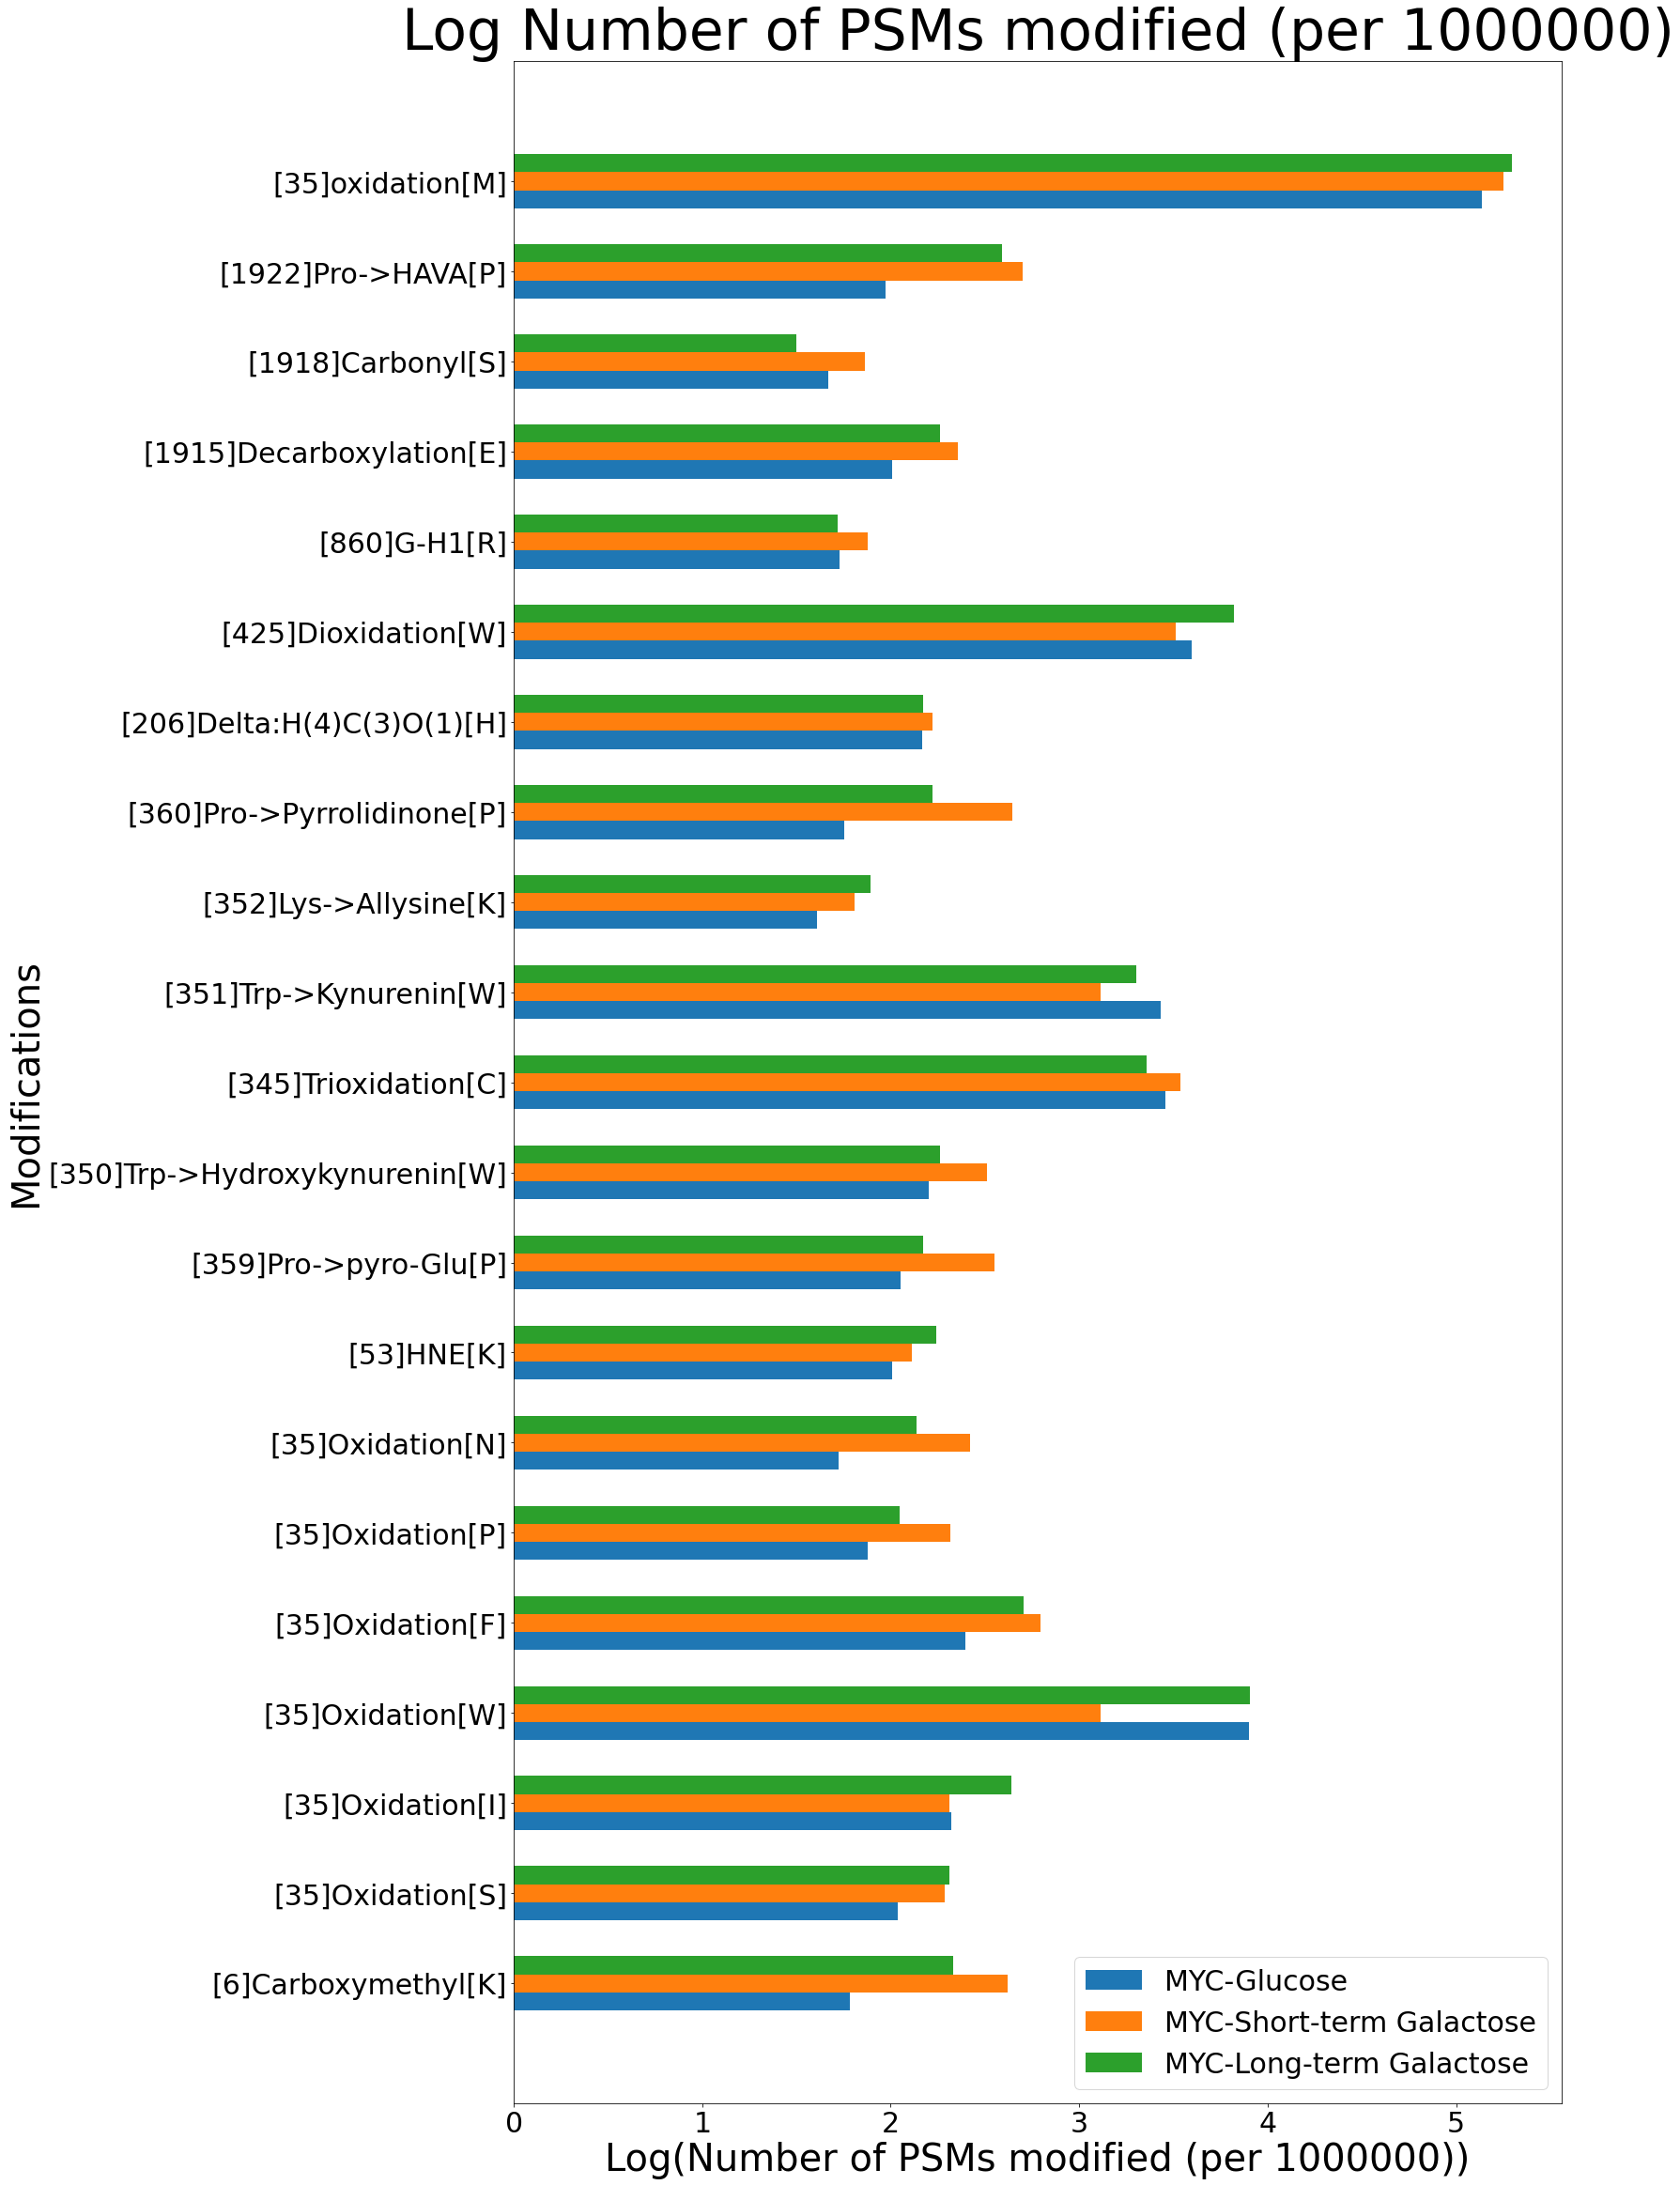

In [26]:
y = modr2["Modification"]
xGlu = np.log10(modr2['Ratios_Glu']*1000000)
xstGal = np.log10(modr2['Ratios_stGal']*1000000)
xltGal = np.log10(modr2['Ratios_ltGal']*1000000)
y_axis = np.arange(len(y))
plt.figure(figsize=(20,40))
plt.barh(y_axis - 0.2, xGlu, 0.2, label = 'MYC-Glucose')
plt.barh(y_axis, xstGal, 0.2, label = 'MYC-Short-term Galactose')
plt.barh(y_axis + 0.2, xltGal, 0.2, label = 'MYC-Long-term Galactose')

plt.yticks(y_axis, y)
plt.ylabel("Modifications", fontsize = 40)
plt.xlabel("Log(Number of PSMs modified (per 1000000))", fontsize = 40)
plt.title("Log Number of PSMs modified (per 1000000)", fontsize = 60)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 30)
plt.show()

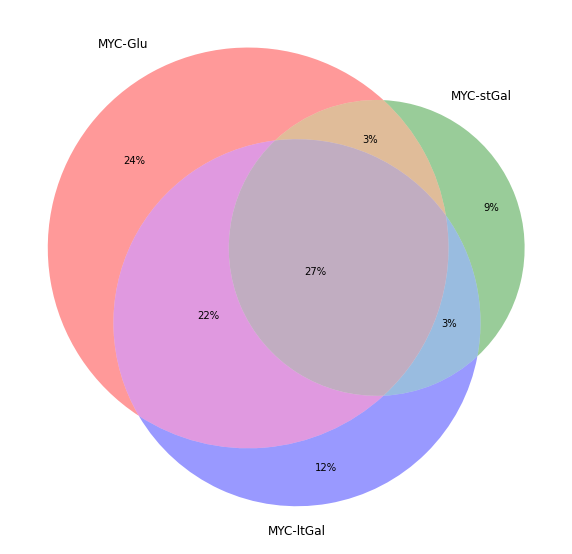

In [27]:
OA.condition_venn([MYCrep,MYCstrep,MYCltrep], ["MYC-Glu", "MYC-stGal", "MYC-ltGal"])

In [28]:
RPMMYC = OA.relative_PSM_modification(MYCrep)
RPMMYCst = OA.relative_PSM_modification(MYCstrep)
RPMMYClt = OA.relative_PSM_modification(MYCltrep)

In [29]:
RPM2 = pd.merge(RPMMYC,RPMMYCst, on="Amino acid", suffixes=('_MYC','_MYCst'))
RPM2 = pd.merge(RPM2, RPMMYClt, on="Amino acid")
RPM2 = RPM2.rename(columns={"Relative level of PSMs containing unmodified residue": "Relative level of PSMs containing unmodified residue_MYClt"})
RPM2

,Amino acid,Relative level of PSMs containing unmodified residue_MYC,Relative level of PSMs containing unmodified residue_MYCst,Relative level of PSMs containing unmodified residue_MYClt
0,A,0.999380,0.999102,0.999275
1,R,0.998749,0.998926,0.998970
2,N,0.996394,0.996545,0.996125
3,D,0.994958,0.995798,0.996246
4,C,0.024618,0.059098,0.025787
5,Q,0.993529,0.993599,0.994642
6,E,0.996845,0.997216,0.997563
7,G,0.999815,0.999747,0.999871
8,H,0.998441,0.998575,0.998434
9,I,0.999574,0.999880,0.999617


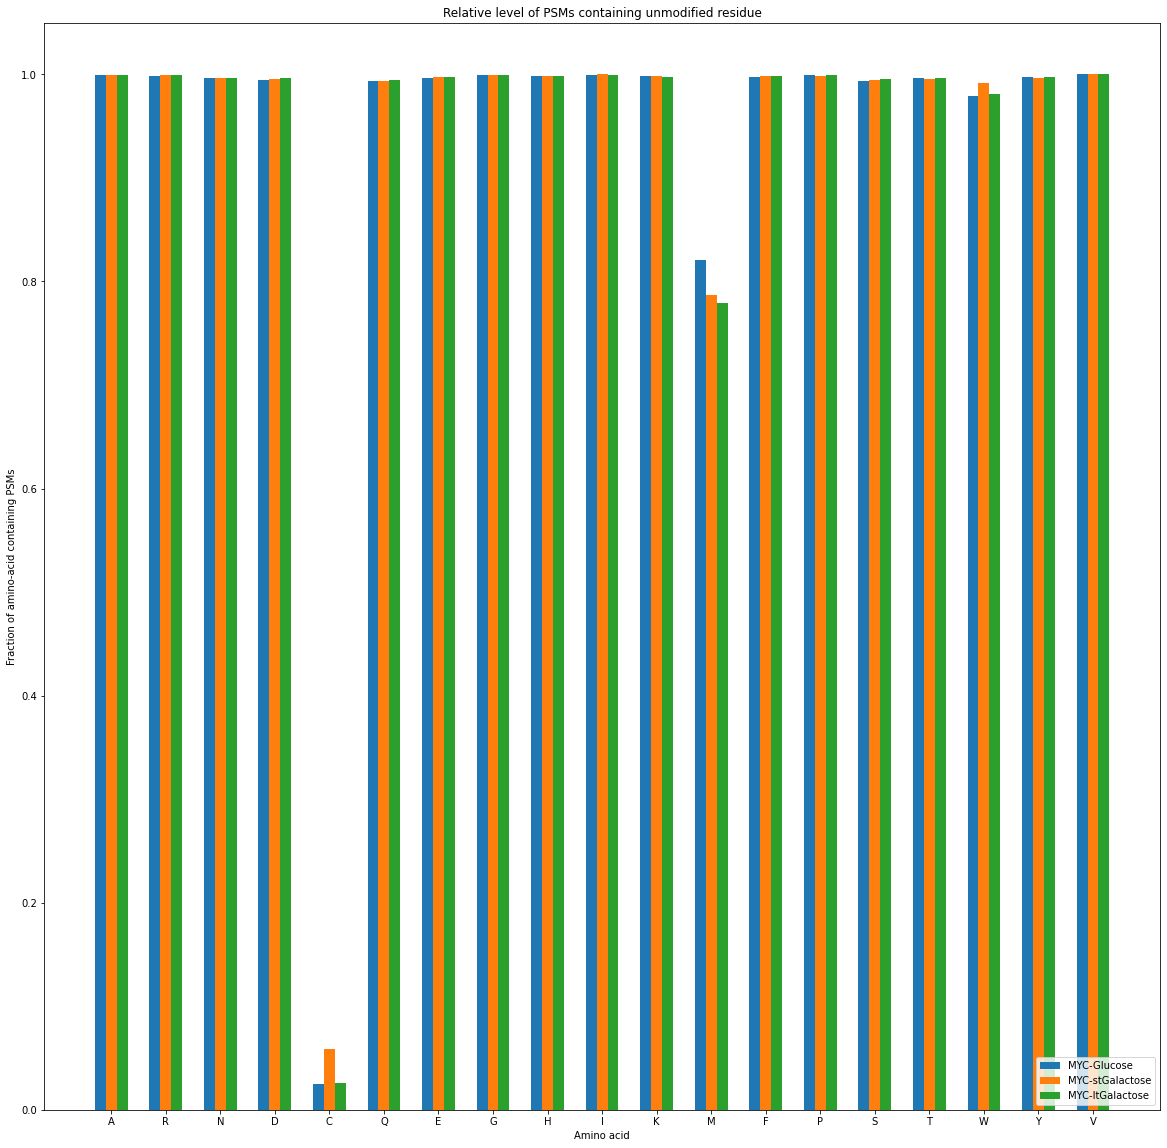

In [30]:
x = RPM2["Amino acid"]
xGlu = RPM2["Relative level of PSMs containing unmodified residue_MYC"]
xst = RPM2['Relative level of PSMs containing unmodified residue_MYCst']
xlt = RPM2['Relative level of PSMs containing unmodified residue_MYClt']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xGlu, 0.2, label = 'MYC-Glucose')
plt.bar(x_axis, xst, 0.2, label = 'MYC-stGalactose')
plt.bar(x_axis + 0.2, xlt, 0.2, label = 'MYC-ltGalactose')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (20,20)
plt.legend(loc="lower right")
plt.show()

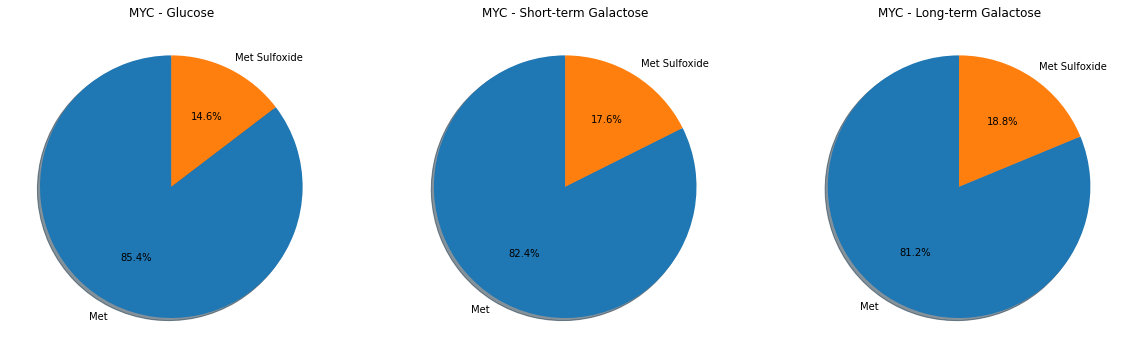

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
OA.methionine_overview(MYCrep, ax1)
OA.methionine_overview(MYCstrep, ax2)
OA.methionine_overview(MYCltrep, ax3)
plt.title("Methionine containing peptides")
ax1.set_title("MYC - Glucose")
ax2.set_title("MYC - Short-term Galactose")
ax3.set_title("MYC - Long-term Galactose")
plt.show()

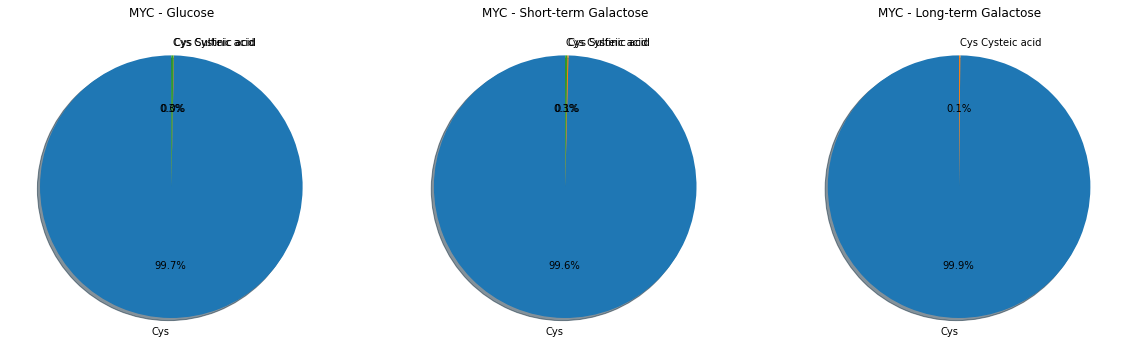

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
OA.cysteine_overview(MYCrep, ax1)
OA.cysteine_overview(MYCstrep, ax2)
OA.cysteine_overview(MYCltrep, ax3)
plt.title("cysteine containing peptides")
ax1.set_title("MYC - Glucose")
ax2.set_title("MYC - Short-term Galactose")
ax3.set_title("MYC - Long-term Galactose")
plt.show()

### 3) None in Glucose, None in short-term Galactose, None in long-term Galactose

In [33]:
print("There are this many replicates of Control treatment: {}".format(Control["spectrum_file"].nunique()))
print("There are this many replicates of Controlst treatment: {}".format(Controlst["spectrum_file"].nunique()))
print("There are this many replicates of Controllt treatment: {}".format(Controllt["spectrum_file"].nunique()))

There are this many replicates of Control treatment: 4
There are this many replicates of Controlst treatment: 4
There are this many replicates of Controllt treatment: 4


In [34]:
Controlrep = OA.replicate_filter(Control,2)
Controlstrep = OA.replicate_filter(Controlst,2)
Controlltrep = OA.replicate_filter(Controllt,2)

In [35]:
print("The ratio of PSMs that contain an oxidative modification in the Control treatment subset: {}".format((Controlrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the Controlst treatment subset: {}".format((Controlstrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the Controllt treatment subset: {}".format((Controlltrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the Control treatment subset: 2.999596573245687 %
The ratio of PSMs that contain an oxidative modification in the Controlst treatment subset: 3.4272001199895006 %
The ratio of PSMs that contain an oxidative modification in the Controllt treatment subset: 3.7858787844745265 %


In [36]:
mrControlrep = OA.modratios(Controlrep)
mrControlstrep = OA.modratios(Controlst)
mrControlltrep = OA.modratios(Controllt)

In [37]:
modr_temp3 = pd.merge(mrControlltrep, mrControlstrep, on="Modification", suffixes=('_ltGal', '_stGal'))
modr3 = pd.merge(modr_temp3, mrControlrep, on="Modification")
modr3 = modr3.rename(columns={'Ratios':'Ratios_Glu'})
modr3 = modr3.drop(modr3[(modr3["Ratios_ltGal"] == 0) | (modr3["Ratios_stGal"] == 0) | (modr3["Ratios_Glu"] == 0)].index)
modr3

,Modification,Ratios_ltGal,Ratios_stGal,Ratios_Glu
0,[6]Carboxymethyl[K],0.000177,0.000129,0.000031
2,[35]Oxidation[E],0.000125,0.000195,0.000036
6,[35]Oxidation[I],0.000385,0.000344,0.000130
8,[35]Oxidation[W],0.018848,0.004028,0.006059
15,[35]Oxidation[F],0.000380,0.000368,0.000346
17,[35]Oxidation[N],0.000122,0.000195,0.000042
20,[53]HNE[K],0.000177,0.000184,0.000062
23,[359]Pro->pyro-Glu[P],0.000249,0.000215,0.000258
27,[345]Trioxidation[W],0.000775,0.000644,0.000790
28,[345]Trioxidation[C],0.006377,0.001758,0.003408


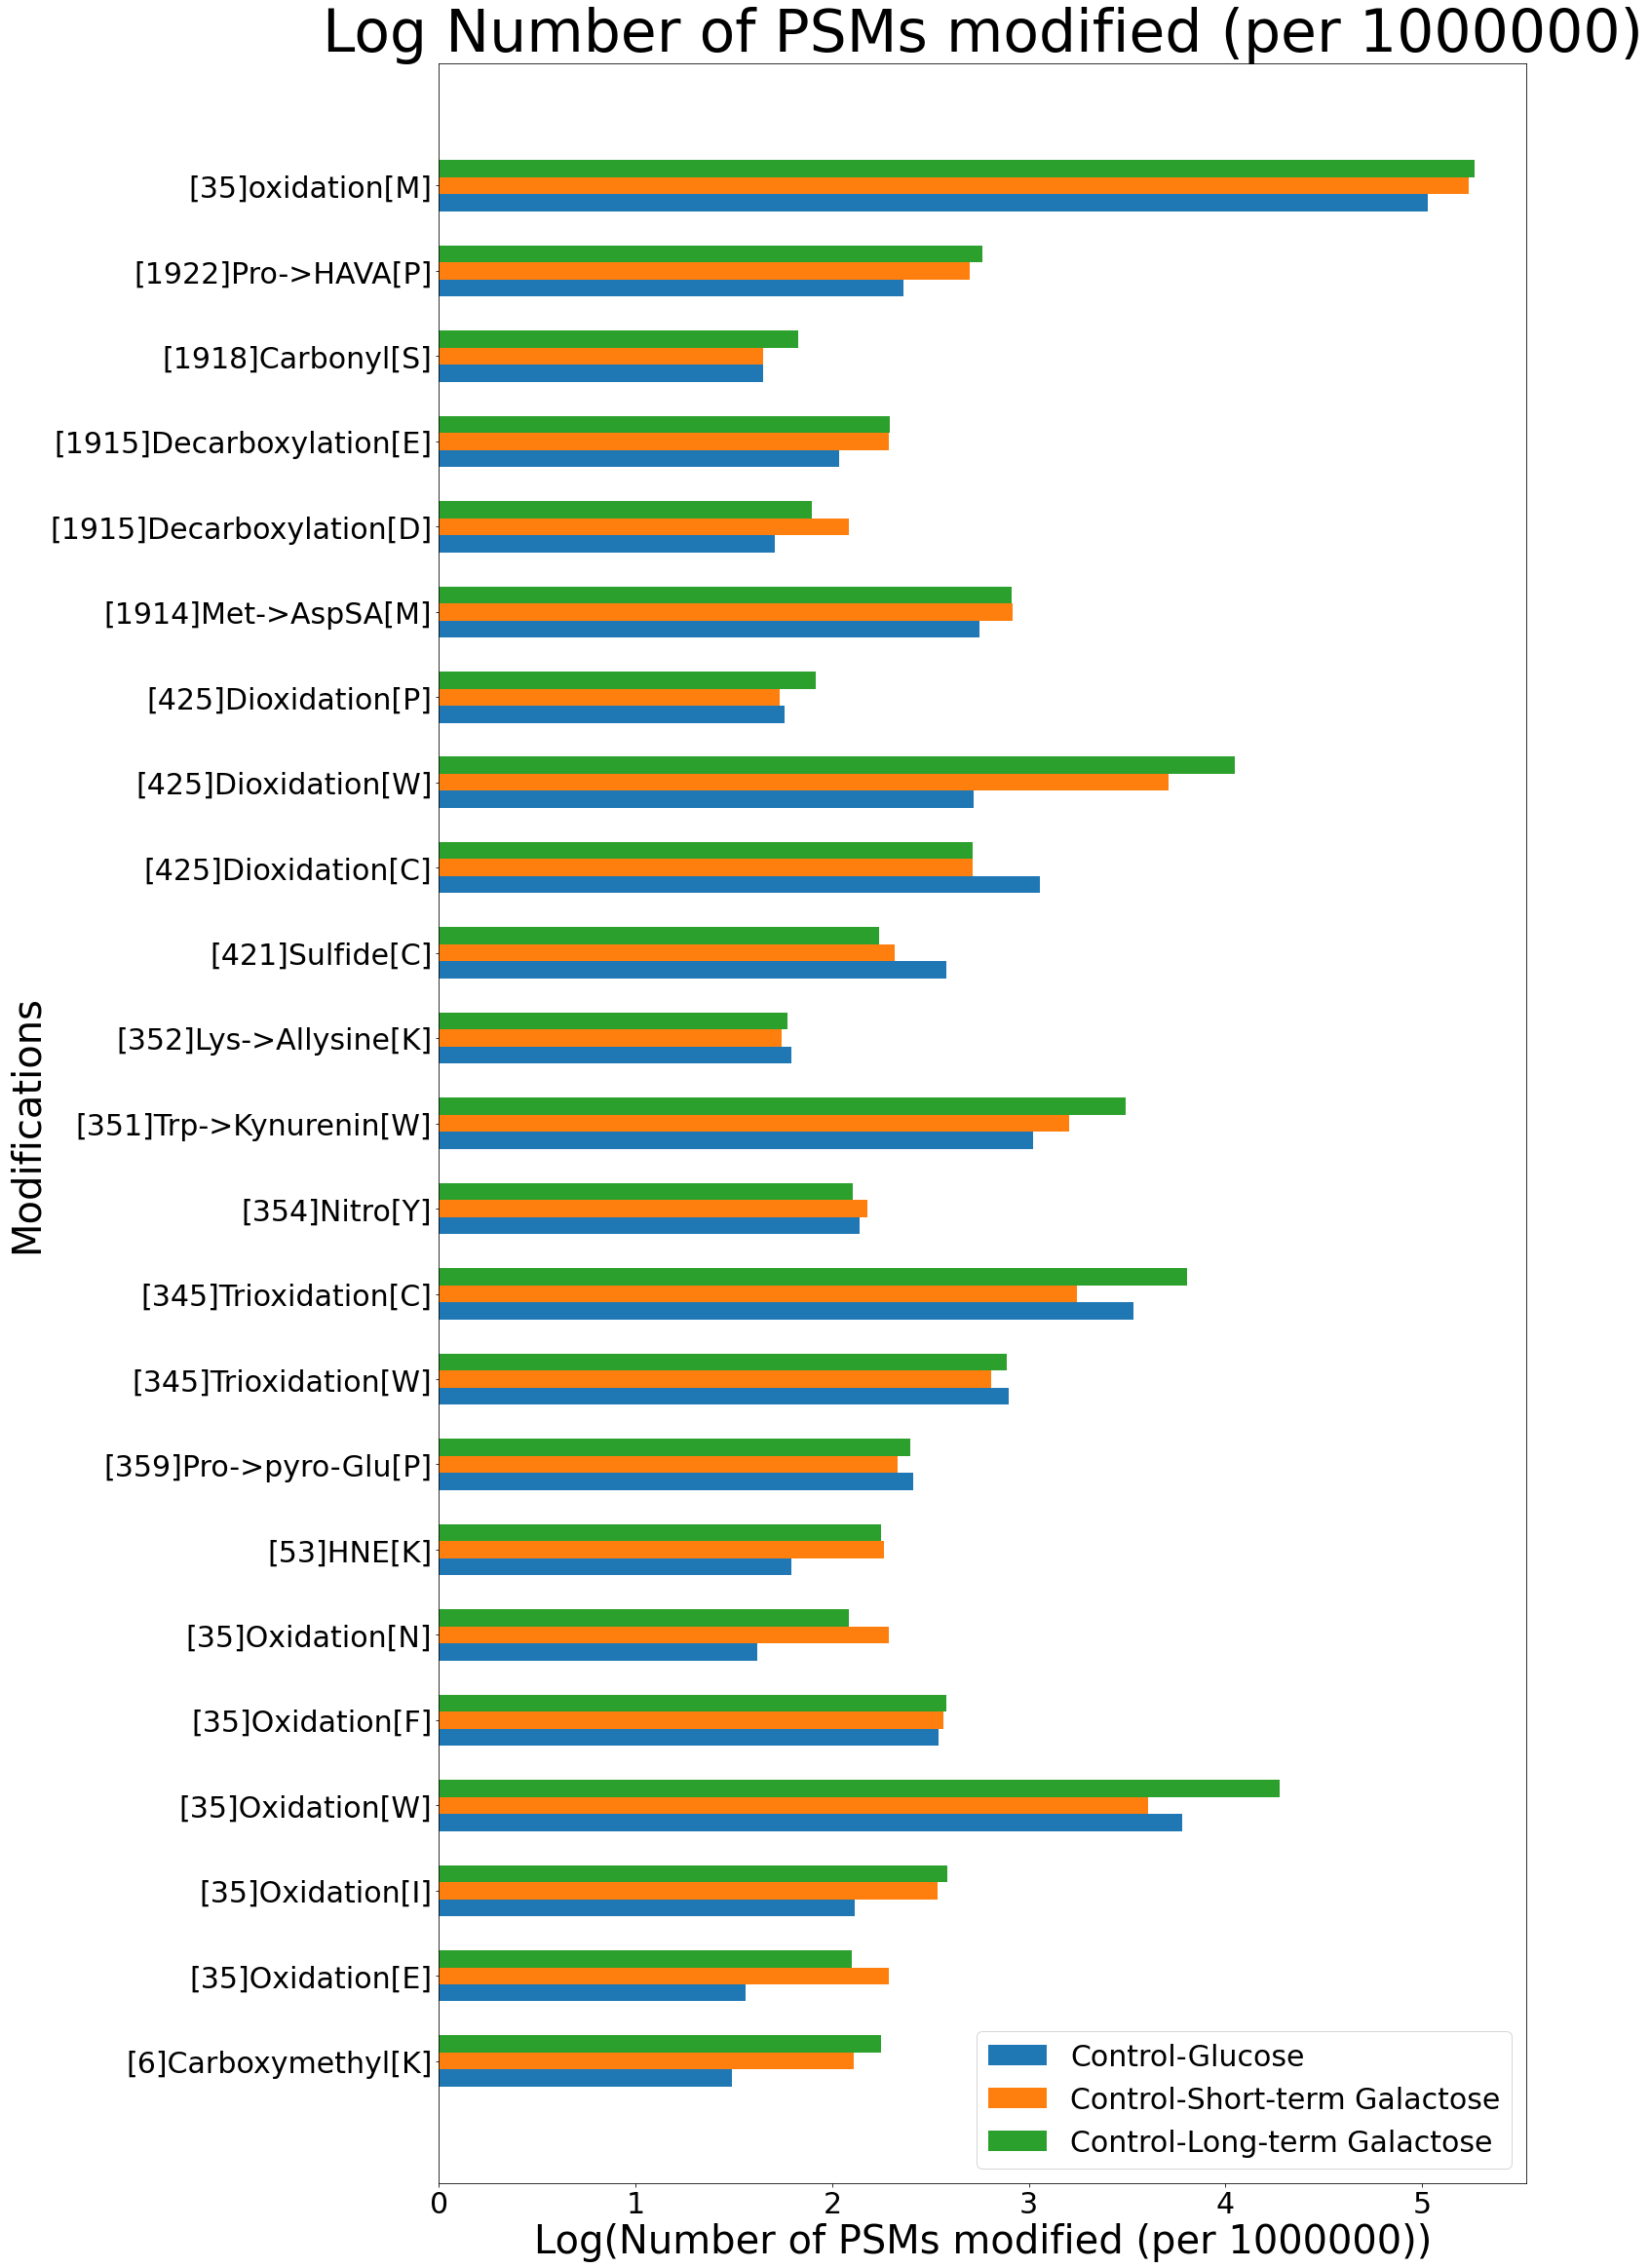

In [38]:
y = modr3["Modification"]
xGlu = np.log10(modr3['Ratios_Glu']*1000000)
xstGal = np.log10(modr3['Ratios_stGal']*1000000)
xltGal = np.log10(modr3['Ratios_ltGal']*1000000)
y_axis = np.arange(len(y))
plt.figure(figsize=(20,40))
plt.barh(y_axis - 0.2, xGlu, 0.2, label = 'Control-Glucose')
plt.barh(y_axis, xstGal, 0.2, label = 'Control-Short-term Galactose')
plt.barh(y_axis + 0.2, xltGal, 0.2, label = 'Control-Long-term Galactose')

plt.yticks(y_axis, y)
plt.ylabel("Modifications", fontsize = 40)
plt.xlabel("Log(Number of PSMs modified (per 1000000))", fontsize = 40)
plt.title("Log Number of PSMs modified (per 1000000)", fontsize = 60)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 30)
plt.show()

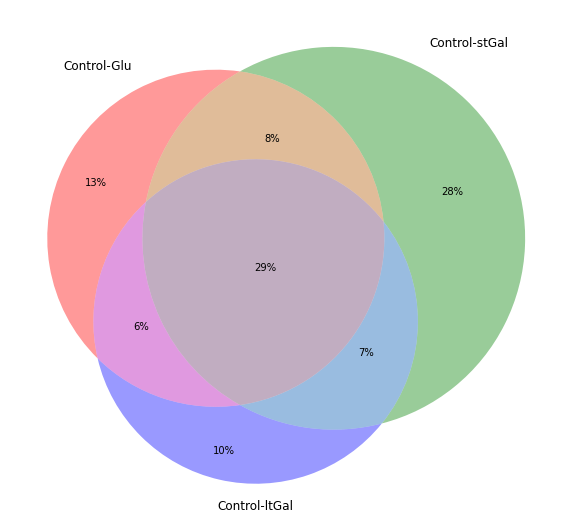

In [39]:
OA.condition_venn([Controlrep,Controlstrep,Controlltrep], ["Control-Glu", "Control-stGal", "Control-ltGal"])

In [40]:
RPMControl = OA.relative_PSM_modification(Controlrep)
RPMControlst = OA.relative_PSM_modification(Controlstrep)
RPMControllt = OA.relative_PSM_modification(Controlltrep)

In [41]:
RPM3 = pd.merge(RPMControl,RPMControlst, on="Amino acid", suffixes=('_Control','_Controlst'))
RPM3 = pd.merge(RPM3, RPMControllt, on="Amino acid")
RPM3 = RPM3.rename(columns={"Relative level of PSMs containing unmodified residue": "Relative level of PSMs containing unmodified residue_Controllt"})
RPM3

,Amino acid,Relative level of PSMs containing unmodified residue_Control,Relative level of PSMs containing unmodified residue_Controlst,Relative level of PSMs containing unmodified residue_Controllt
0,A,0.998763,0.999232,0.998839
1,R,0.998397,0.998675,0.999134
2,N,0.995209,0.997179,0.996753
3,D,0.995586,0.996833,0.995605
4,C,0.087012,0.029278,0.041088
5,Q,0.993651,0.994660,0.994773
6,E,0.997742,0.996980,0.997410
7,G,0.999686,0.999755,0.999716
8,H,0.998571,0.998214,0.998562
9,I,0.999907,0.999931,0.999776


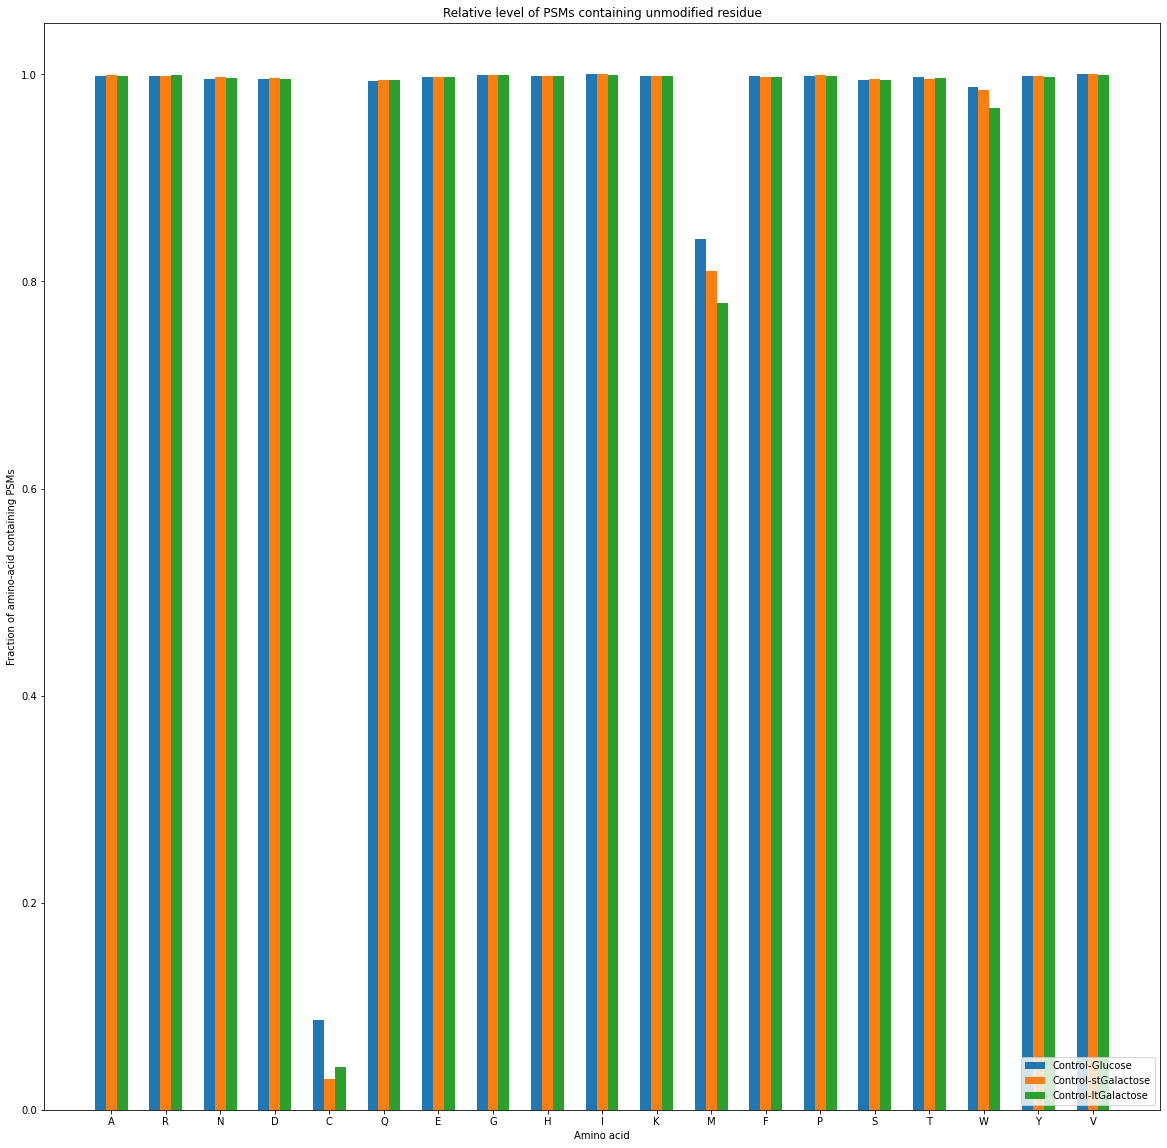

In [42]:
x = RPM3["Amino acid"]
xGlu = RPM3["Relative level of PSMs containing unmodified residue_Control"]
xst = RPM3['Relative level of PSMs containing unmodified residue_Controlst']
xlt = RPM3['Relative level of PSMs containing unmodified residue_Controllt']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xGlu, 0.2, label = 'Control-Glucose')
plt.bar(x_axis, xst, 0.2, label = 'Control-stGalactose')
plt.bar(x_axis + 0.2, xlt, 0.2, label = 'Control-ltGalactose')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (20,20)
plt.legend(loc="lower right")
plt.show()

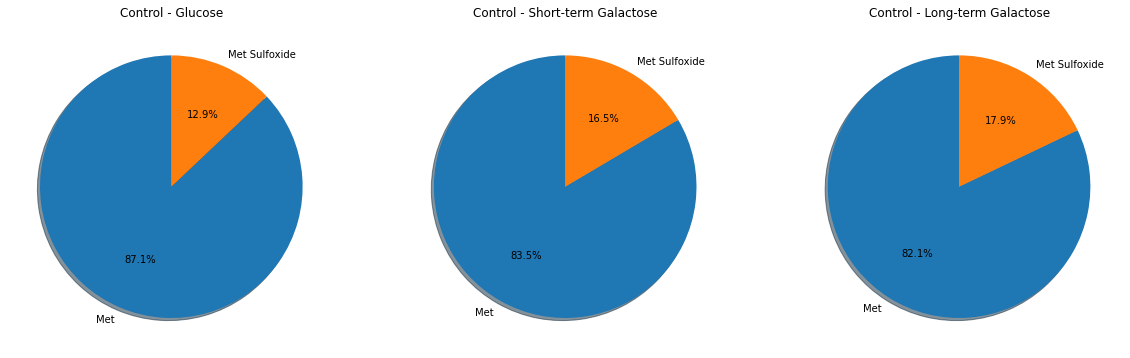

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
OA.methionine_overview(Controlrep, ax1)
OA.methionine_overview(Controlstrep, ax2)
OA.methionine_overview(Controlltrep, ax3)
plt.title("Methionine containing peptides")
ax1.set_title("Control - Glucose")
ax2.set_title("Control - Short-term Galactose")
ax3.set_title("Control - Long-term Galactose")
plt.show()

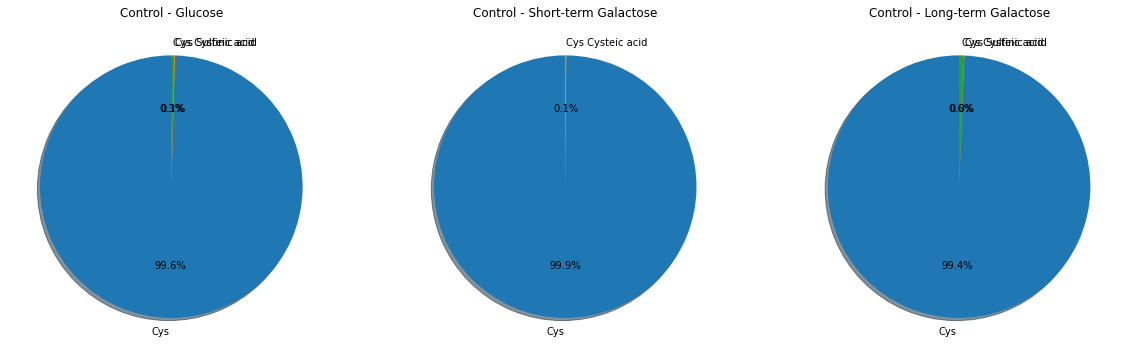

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
OA.cysteine_overview(Controlrep, ax1)
OA.cysteine_overview(Controlstrep, ax2)
OA.cysteine_overview(Controlltrep, ax3)
plt.title("cysteine containing peptides")
ax1.set_title("Control - Glucose")
ax2.set_title("Control - Short-term Galactose")
ax3.set_title("Control - Long-term Galactose")
plt.show()

### 4) Control vs Constitutively active AKT vs Constitutively active MYC in Glucose medium

In [45]:
print("The ratio of PSMs that contain an oxidative modification in the Control treatment subset: {}".format((Controlrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the AKT treatment subset: {}".format((AKTrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the MYC treatment subset: {}".format((MYCrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the Control treatment subset: 2.999596573245687 %
The ratio of PSMs that contain an oxidative modification in the AKT treatment subset: 2.3522874606408593 %
The ratio of PSMs that contain an oxidative modification in the MYC treatment subset: 3.127058861339204 %


In [46]:
modr_temp4 = pd.merge(mrAKTrep, mrMYCrep, on="Modification", suffixes=('_AKT', '_MYC'))
modr4 = pd.merge(modr_temp4, mrControlrep, on="Modification")
modr4 = modr4.rename(columns={'Ratios' : 'Ratios_Control'})
modr4 = modr4.drop(modr4[(modr4['Ratios_MYC'] == 0) | (modr4['Ratios_AKT'] == 0) | (modr4['Ratios_Control'] == 0)].index)
modr4

,Modification,Ratios_AKT,Ratios_MYC,Ratios_Control
0,[6]Carboxymethyl[K],0.000040,0.000061,0.000031
8,[35]Oxidation[W],0.012195,0.007933,0.006059
15,[35]Oxidation[F],0.000287,0.000249,0.000346
23,[359]Pro->pyro-Glu[P],0.000160,0.000113,0.000258
28,[345]Trioxidation[C],0.003326,0.002882,0.003408
33,[351]Trp->Kynurenin[W],0.001524,0.002697,0.001054
51,[425]Dioxidation[C],0.001663,0.000524,0.001136
52,[425]Dioxidation[W],0.003430,0.003966,0.000527
77,[1915]Decarboxylation[E],0.000185,0.000102,0.000109
96,[35]oxidation[M],0.113742,0.137258,0.107594


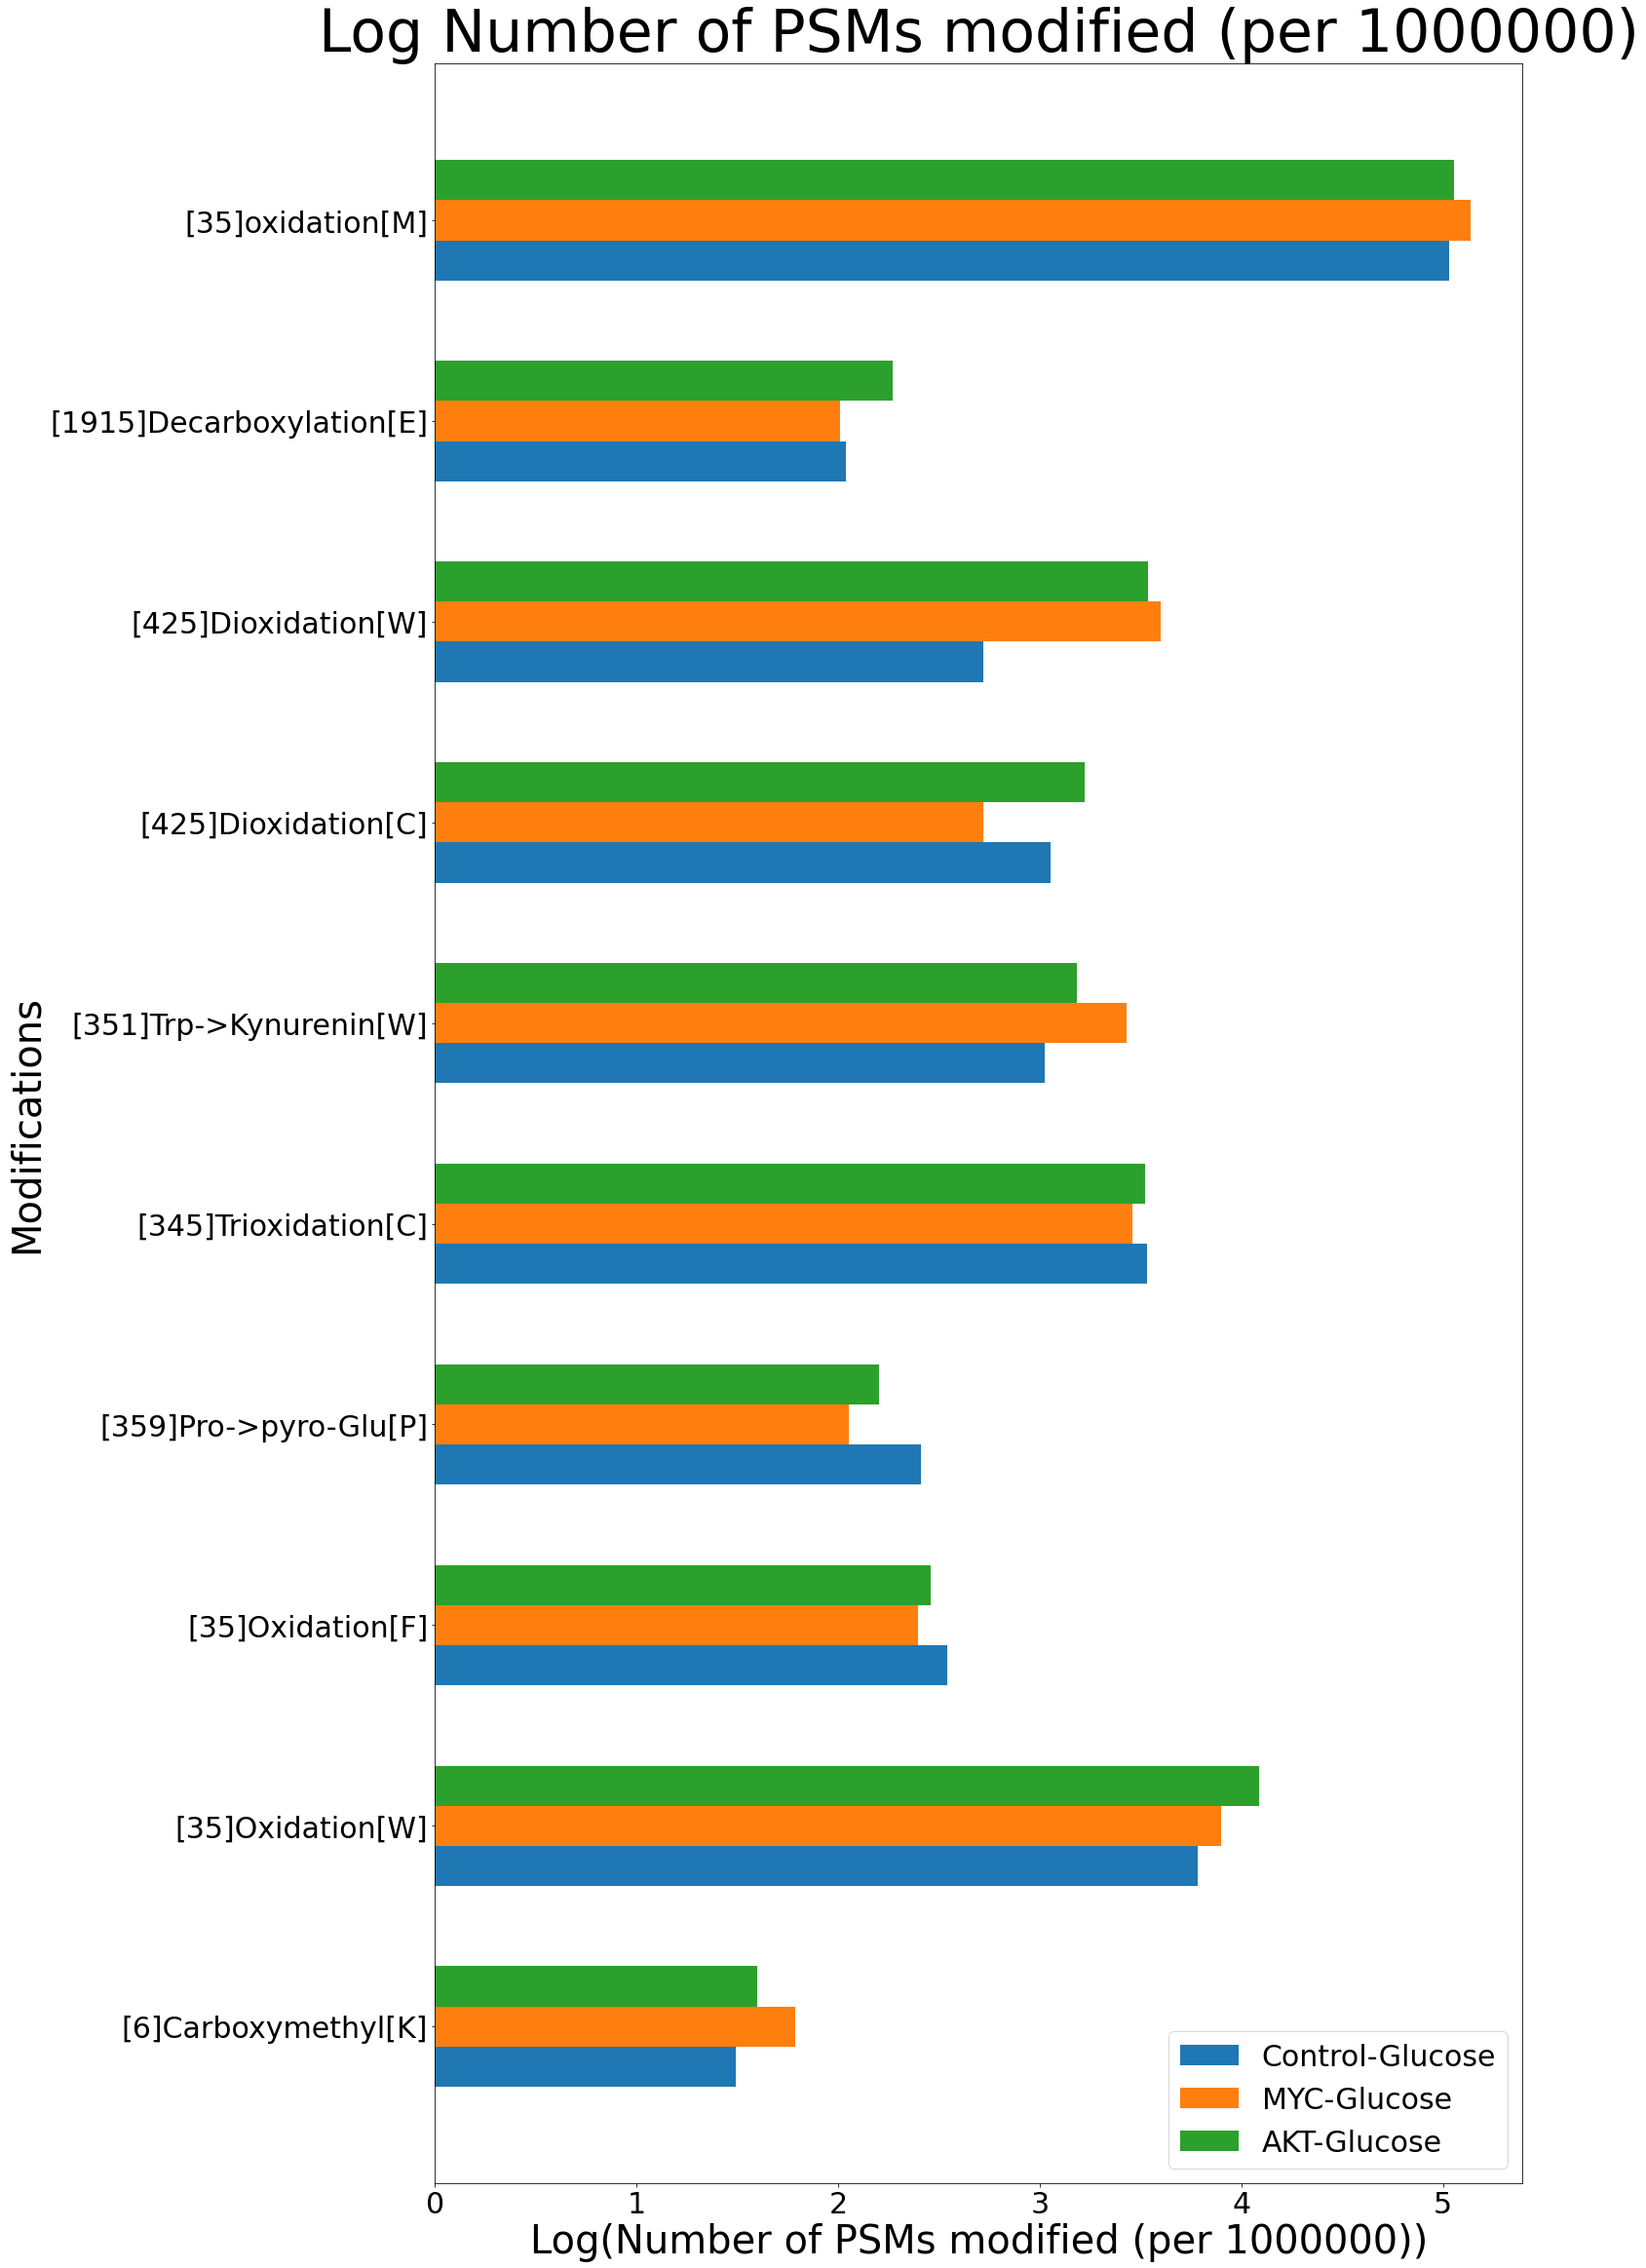

In [47]:
y = modr4["Modification"]
xGlu = np.log10(modr4['Ratios_Control']*1000000)
xstGal = np.log10(modr4['Ratios_MYC']*1000000)
xltGal = np.log10(modr4['Ratios_AKT']*1000000)
y_axis = np.arange(len(y))
plt.figure(figsize=(20,40))
plt.barh(y_axis - 0.2, xGlu, 0.2, label = 'Control-Glucose')
plt.barh(y_axis, xstGal, 0.2, label = 'MYC-Glucose')
plt.barh(y_axis + 0.2, xltGal, 0.2, label = 'AKT-Glucose')

plt.yticks(y_axis, y)
plt.ylabel("Modifications", fontsize = 40)
plt.xlabel("Log(Number of PSMs modified (per 1000000))", fontsize = 40)
plt.title("Log Number of PSMs modified (per 1000000)", fontsize = 60)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 30)
plt.show()

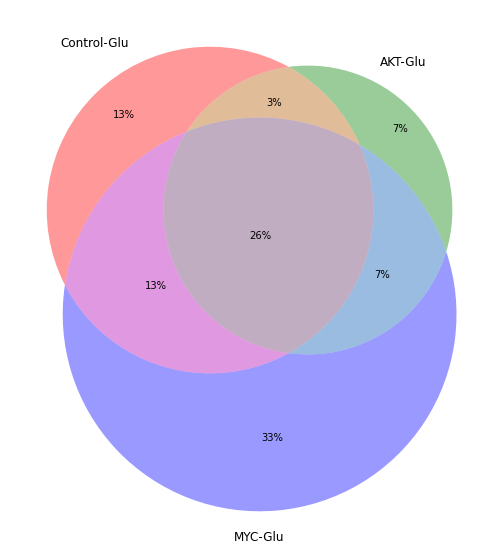

In [48]:
OA.condition_venn([Controlrep,AKTrep,MYCrep], ["Control-Glu", "AKT-Glu", "MYC-Glu"])

In [49]:
RPM4 = pd.merge(RPMControl,RPMAKT, on="Amino acid", suffixes=('_Control','_AKT'))
RPM4 = pd.merge(RPM4, RPMMYC, on="Amino acid")
RPM4 = RPM4.rename(columns={"Relative level of PSMs containing unmodified residue": "Relative level of PSMs containing unmodified residue_MYC"})
RPM4

,Amino acid,Relative level of PSMs containing unmodified residue_Control,Relative level of PSMs containing unmodified residue_AKT,Relative level of PSMs containing unmodified residue_MYC
0,A,0.998763,0.998725,0.999380
1,R,0.998397,0.998493,0.998749
2,N,0.995209,0.996436,0.996394
3,D,0.995586,0.994873,0.994958
4,C,0.087012,0.014382,0.024618
5,Q,0.993651,0.995195,0.993529
6,E,0.997742,0.998021,0.996845
7,G,0.999686,0.999687,0.999815
8,H,0.998571,0.998934,0.998441
9,I,0.999907,0.999738,0.999574


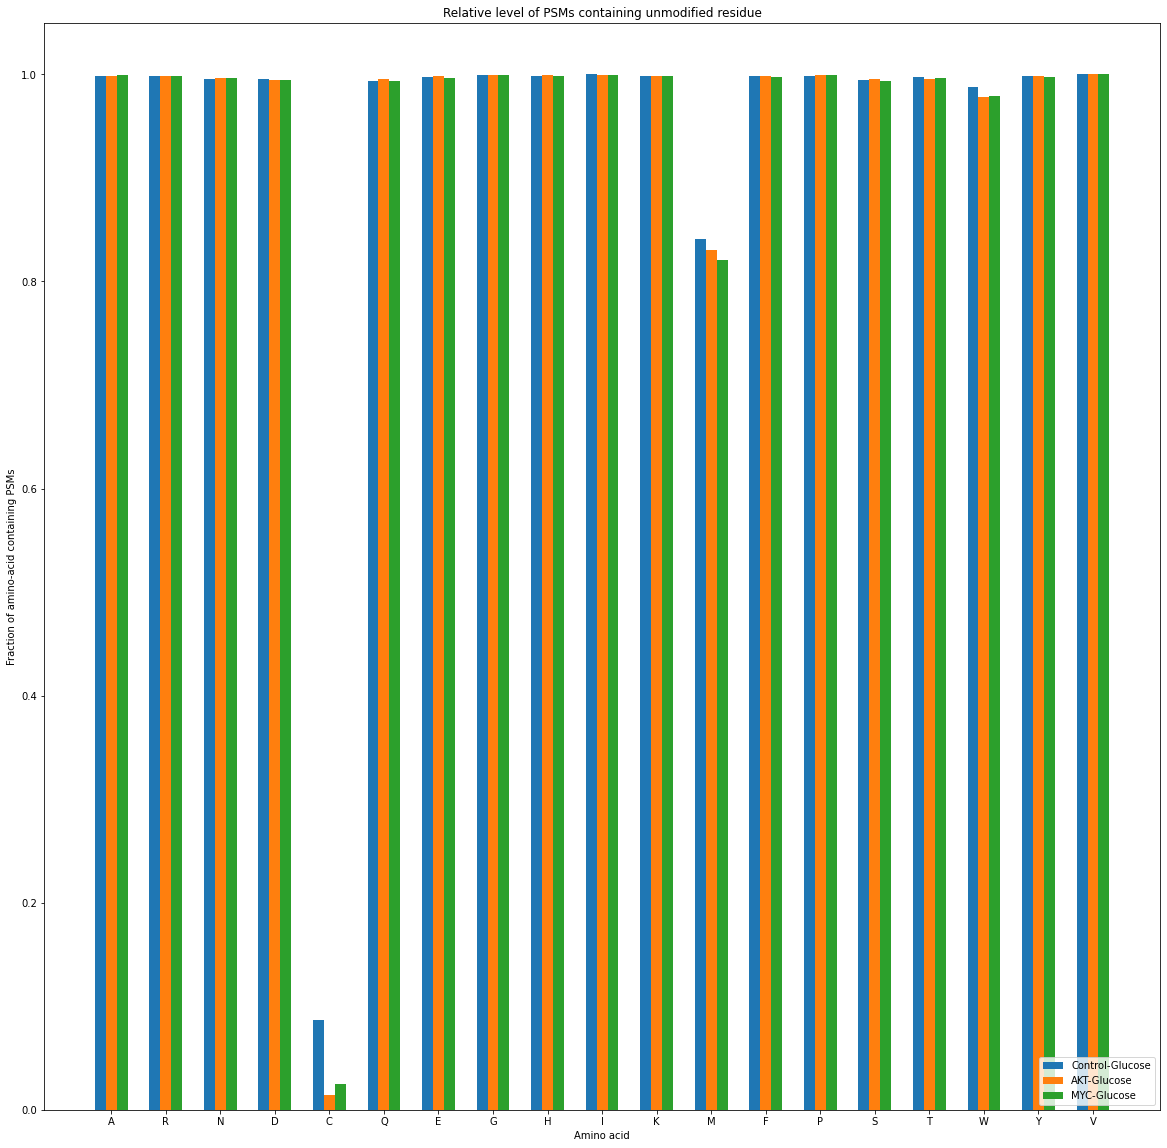

In [50]:
x = RPM4["Amino acid"]
xGlu = RPM4["Relative level of PSMs containing unmodified residue_Control"]
xst = RPM4['Relative level of PSMs containing unmodified residue_AKT']
xlt = RPM4['Relative level of PSMs containing unmodified residue_MYC']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xGlu, 0.2, label = 'Control-Glucose')
plt.bar(x_axis, xst, 0.2, label = 'AKT-Glucose')
plt.bar(x_axis + 0.2, xlt, 0.2, label = 'MYC-Glucose')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (20,20)
plt.legend(loc="lower right")
plt.show()

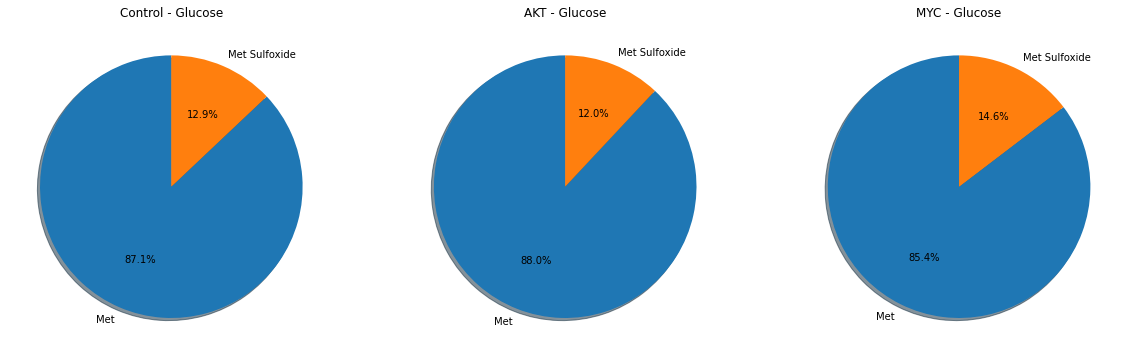

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
OA.methionine_overview(Controlrep, ax1)
OA.methionine_overview(AKTrep, ax2)
OA.methionine_overview(MYCrep, ax3)
plt.title("Methionine containing peptides")
ax1.set_title("Control - Glucose")
ax2.set_title("AKT - Glucose")
ax3.set_title("MYC - Glucose")
plt.show()

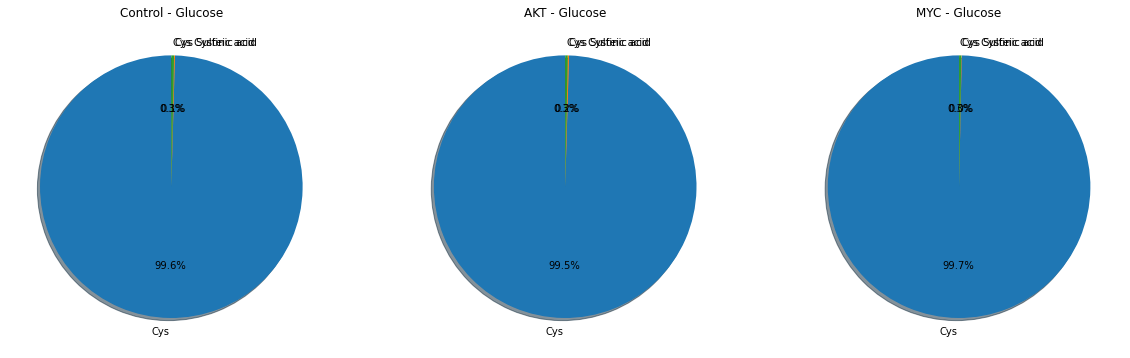

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
OA.cysteine_overview(Controlrep, ax1)
OA.cysteine_overview(AKTrep, ax2)
OA.cysteine_overview(MYCrep, ax3)
plt.title("cysteine containing peptides")
ax1.set_title("Control - Glucose")
ax2.set_title("AKT - Glucose")
ax3.set_title("MYC - Glucose")
plt.show()

### 5) Control, AKT and MYC in short-term Galactose

In [53]:
print("The ratio of PSMs that contain an oxidative modification in the Controlst treatment subset: {}".format((Controlstrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the AKTst treatment subset: {}".format((AKTstrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the MYCst treatment subset: {}".format((MYCstrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the Controlst treatment subset: 3.4272001199895006 %
The ratio of PSMs that contain an oxidative modification in the AKTst treatment subset: 4.151860512216228 %
The ratio of PSMs that contain an oxidative modification in the MYCst treatment subset: 3.4774729738174095 %


In [54]:
modr_temp5 = pd.merge(mrAKTstrep, mrMYCstrep, on="Modification", suffixes=('_AKT', '_MYC'))
modr5 = pd.merge(modr_temp5, mrControlstrep, on="Modification")
modr5 = modr5.rename(columns={'Ratios' : 'Ratios_Control'})
modr5 = modr5.drop(modr5[(modr5['Ratios_MYC'] == 0) | (modr5['Ratios_AKT'] == 0) | (modr5['Ratios_Control'] == 0)].index)
modr5

,Modification,Ratios_AKT,Ratios_MYC,Ratios_Control
0,[6]Carboxymethyl[K],0.000156,0.000418,0.000129
1,[35]Oxidation[T],0.000266,0.000121,0.000180
2,[35]Oxidation[E],0.000205,0.000124,0.000195
3,[35]Oxidation[S],0.000222,0.000194,0.000163
6,[35]Oxidation[I],0.000329,0.000205,0.000344
8,[35]Oxidation[W],0.006262,0.001302,0.004028
10,[35]Oxidation[H],0.000333,0.000167,0.000344
11,[35]Oxidation[V],0.000055,0.000094,0.000097
12,[35]Oxidation[R],0.000050,0.000038,0.000049
15,[35]Oxidation[F],0.000277,0.000625,0.000368


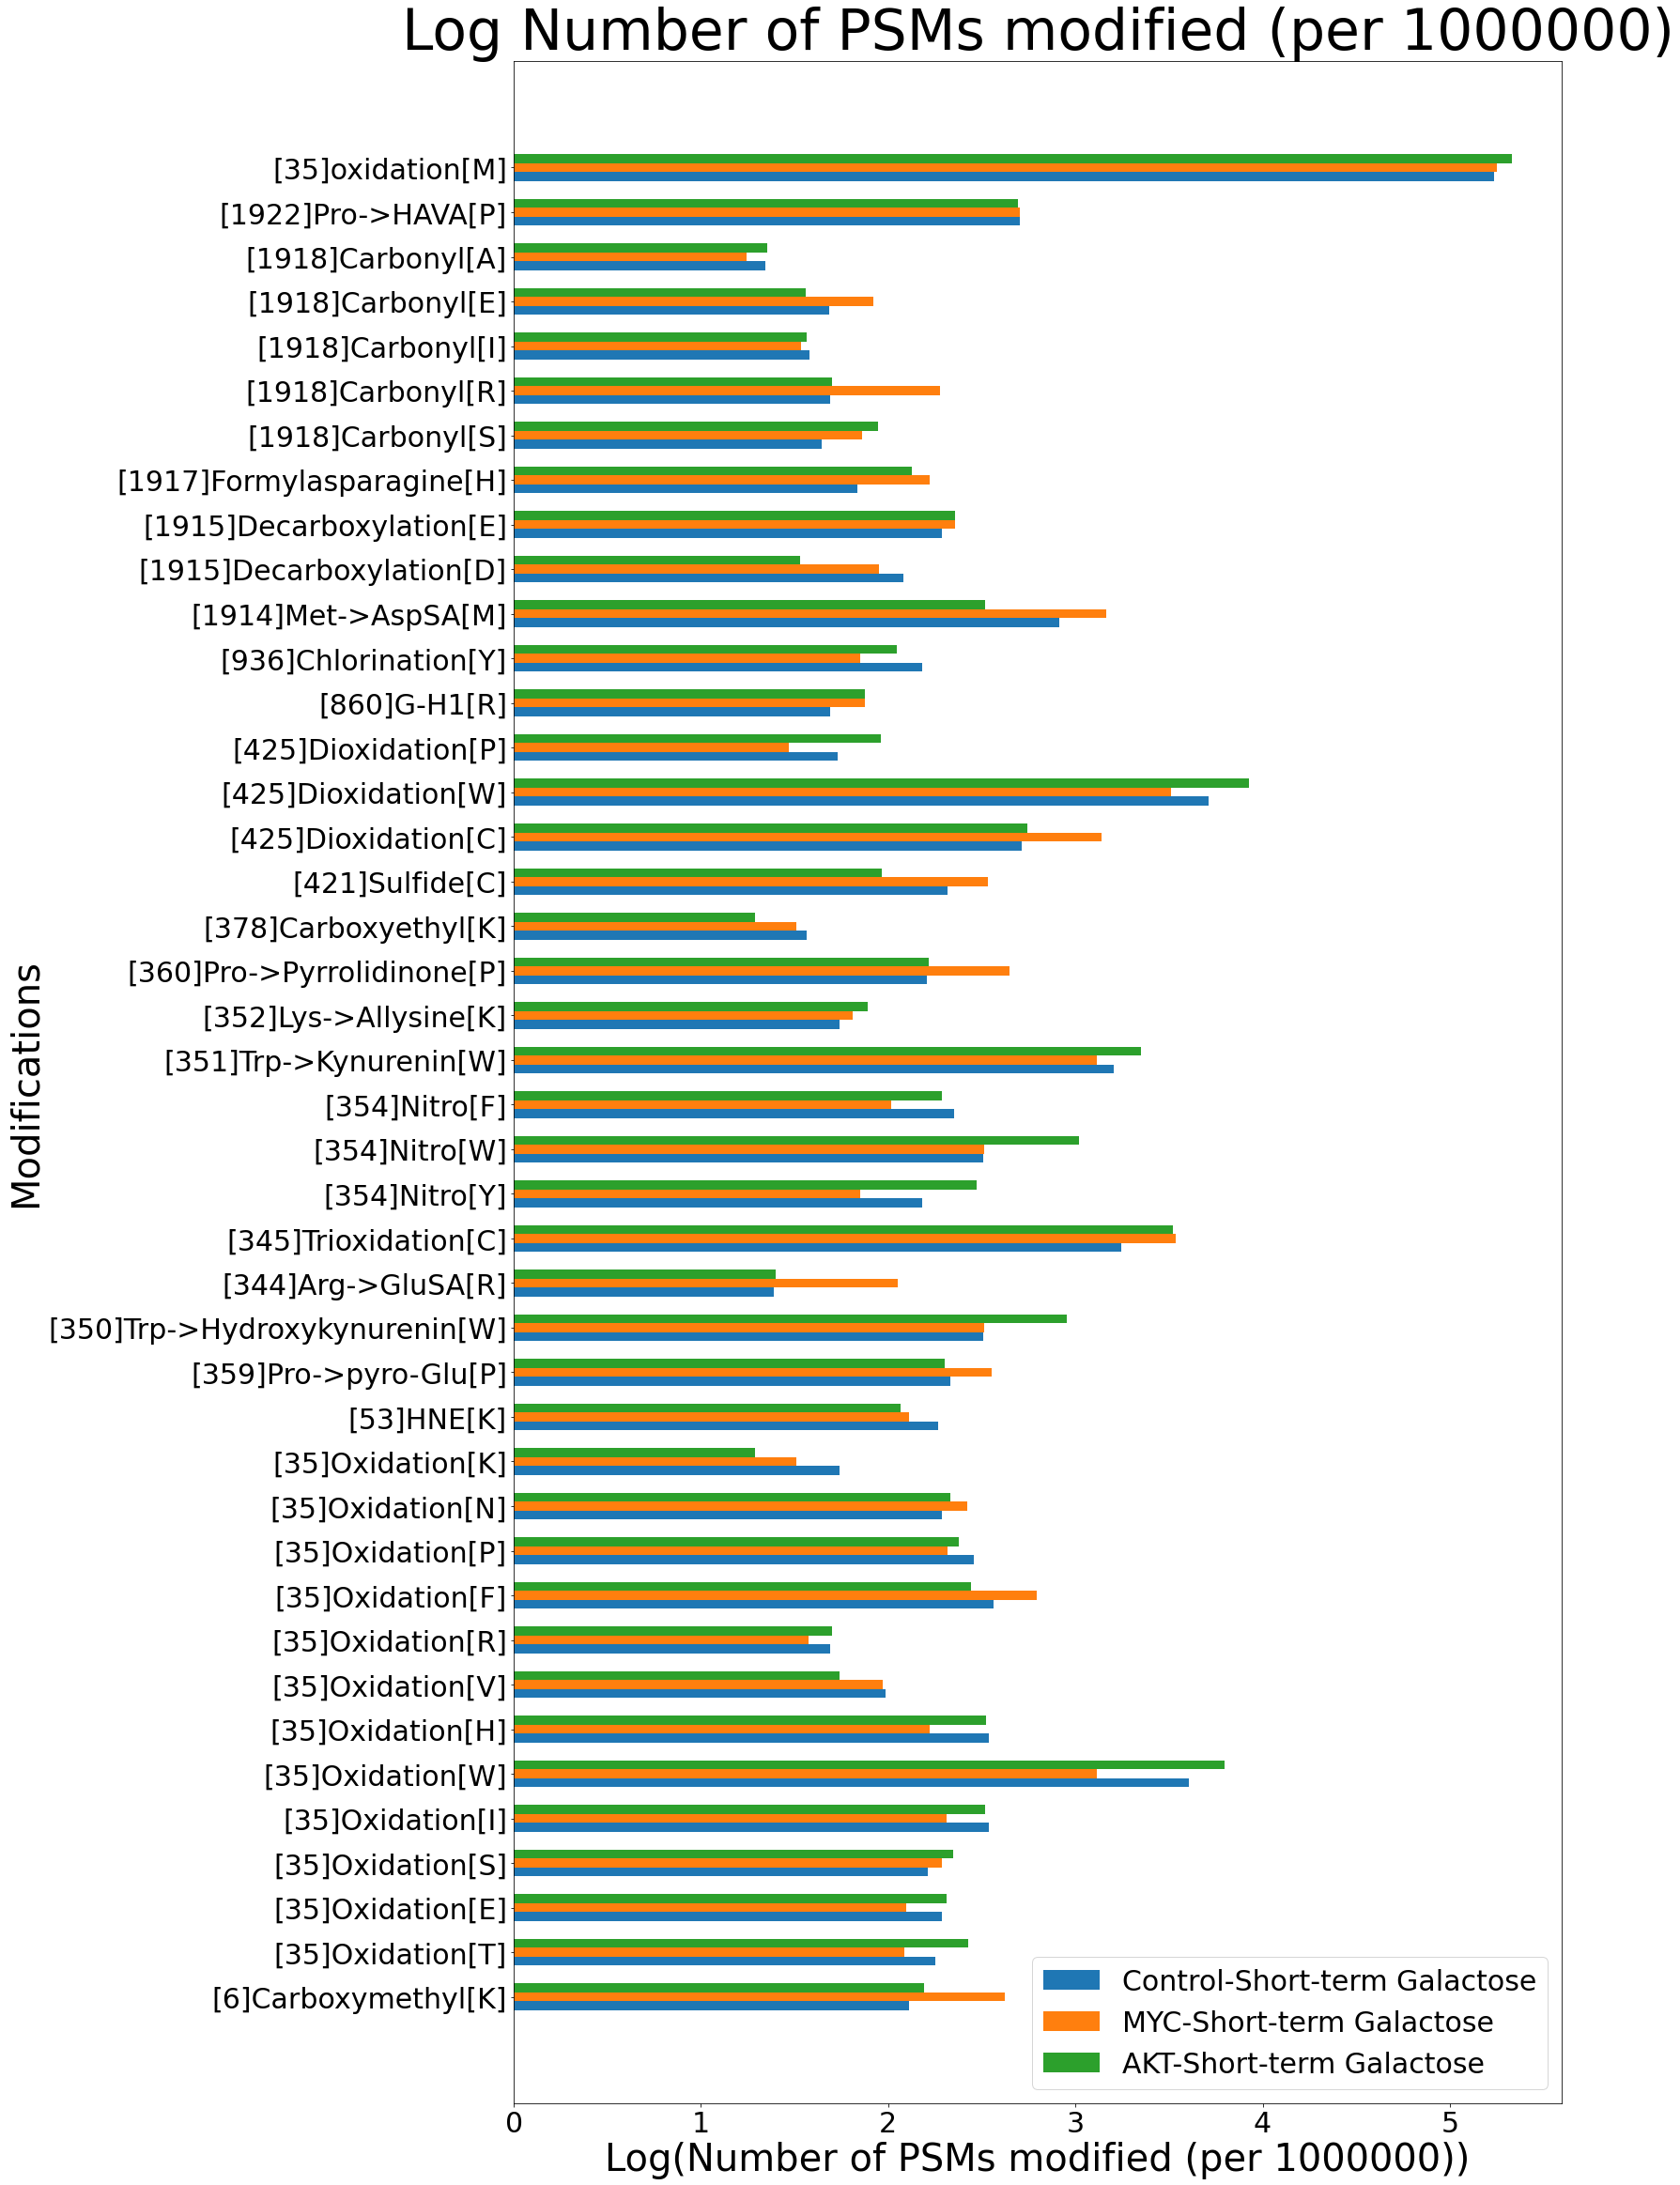

In [55]:
y = modr5["Modification"]
xGlu = np.log10(modr5['Ratios_Control']*1000000)
xstGal = np.log10(modr5['Ratios_MYC']*1000000)
xltGal = np.log10(modr5['Ratios_AKT']*1000000)
y_axis = np.arange(len(y))
plt.figure(figsize=(20,40))
plt.barh(y_axis - 0.2, xGlu, 0.2, label = 'Control-Short-term Galactose')
plt.barh(y_axis, xstGal, 0.2, label = 'MYC-Short-term Galactose')
plt.barh(y_axis + 0.2, xltGal, 0.2, label = 'AKT-Short-term Galactose')

plt.yticks(y_axis, y)
plt.ylabel("Modifications", fontsize = 40)
plt.xlabel("Log(Number of PSMs modified (per 1000000))", fontsize = 40)
plt.title("Log Number of PSMs modified (per 1000000)", fontsize = 60)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 30)
plt.show()

Orange more prevalent?

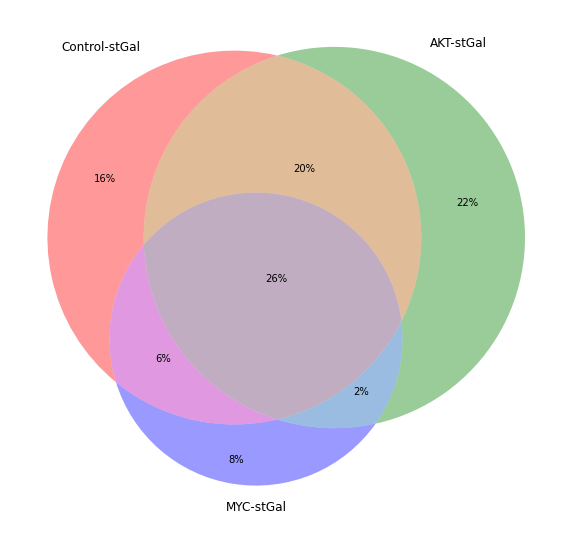

In [56]:
OA.condition_venn([Controlstrep,AKTstrep,MYCstrep], ["Control-stGal", "AKT-stGal", "MYC-stGal"])

In [57]:
RPM5 = pd.merge(RPMControlst,RPMAKTst, on="Amino acid", suffixes=('_Control','_AKT'))
RPM5 = pd.merge(RPM5, RPMMYCst, on="Amino acid")
RPM5 = RPM5.rename(columns={"Relative level of PSMs containing unmodified residue": "Relative level of PSMs containing unmodified residue_MYC"})
RPM5

,Amino acid,Relative level of PSMs containing unmodified residue_Control,Relative level of PSMs containing unmodified residue_AKT,Relative level of PSMs containing unmodified residue_MYC
0,A,0.999232,0.999421,0.999102
1,R,0.998675,0.999329,0.998926
2,N,0.997179,0.996491,0.996545
3,D,0.996833,0.995881,0.995798
4,C,0.029278,0.023148,0.059098
5,Q,0.994660,0.995125,0.993599
6,E,0.996980,0.995888,0.997216
7,G,0.999755,0.999727,0.999747
8,H,0.998214,0.996913,0.998575
9,I,0.999931,0.999629,0.999880


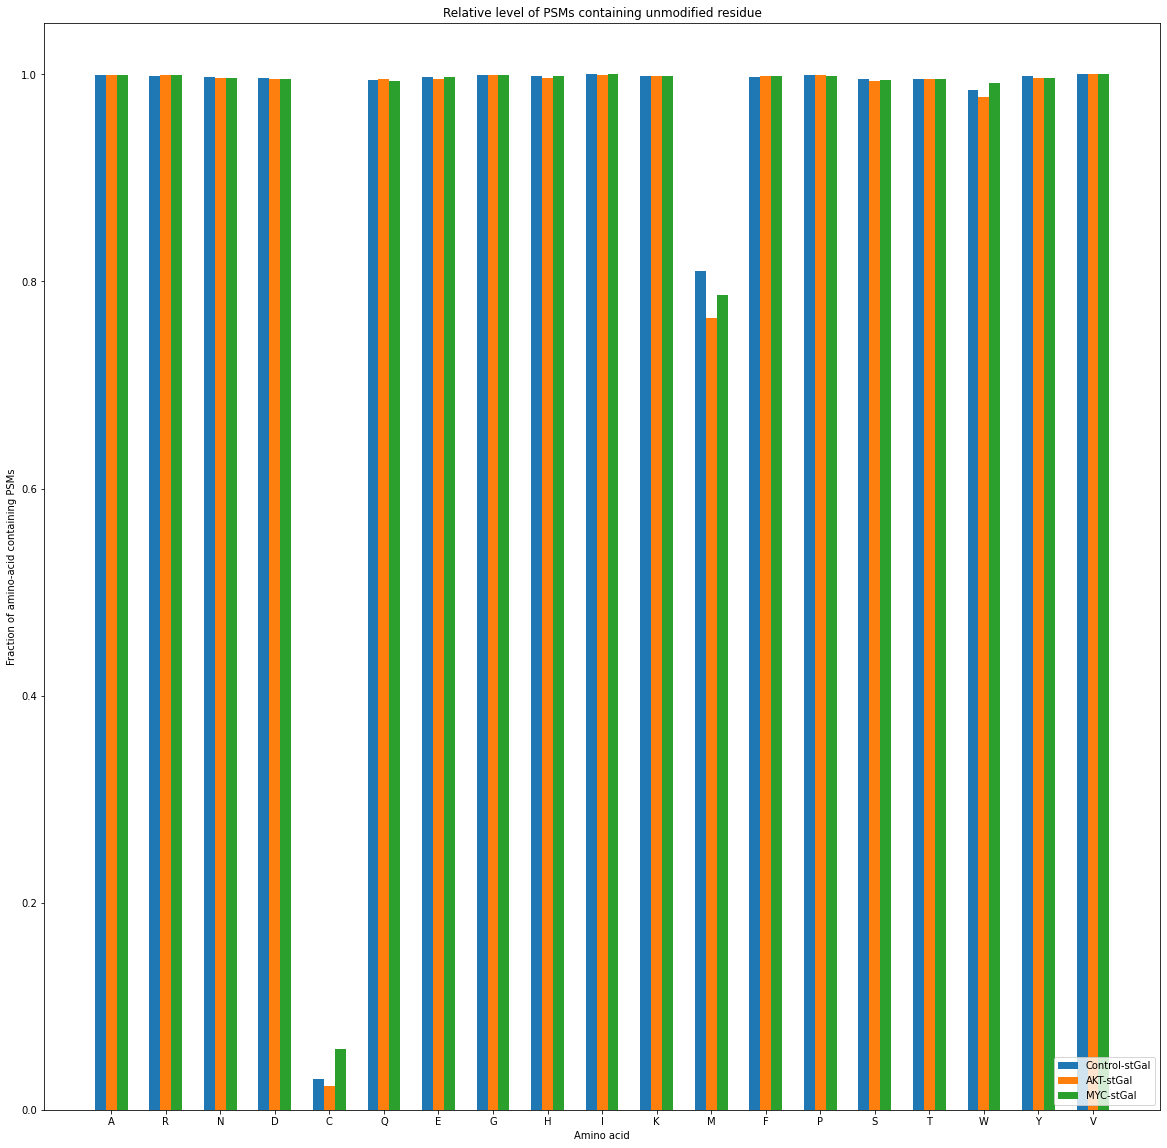

In [58]:
x = RPM5["Amino acid"]
xGlu = RPM5["Relative level of PSMs containing unmodified residue_Control"]
xst = RPM5['Relative level of PSMs containing unmodified residue_AKT']
xlt = RPM5['Relative level of PSMs containing unmodified residue_MYC']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xGlu, 0.2, label = 'Control-stGal')
plt.bar(x_axis, xst, 0.2, label = 'AKT-stGal')
plt.bar(x_axis + 0.2, xlt, 0.2, label = 'MYC-stGal')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (20,20)
plt.legend(loc="lower right")
plt.show()

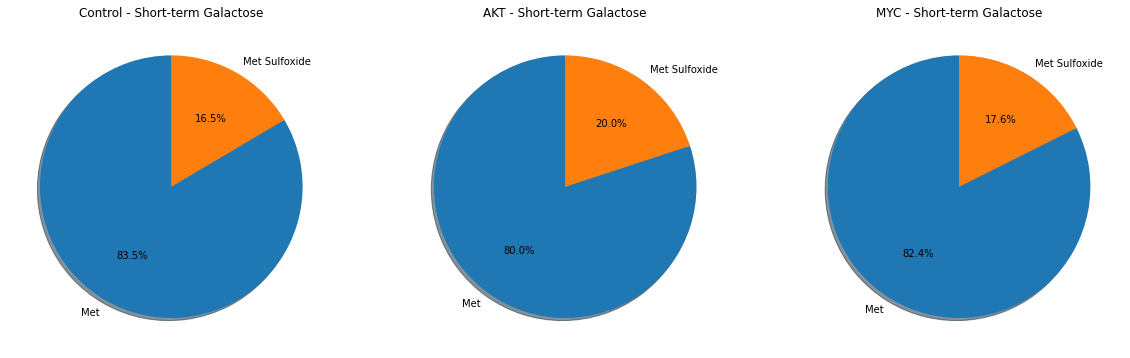

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
OA.methionine_overview(Controlstrep, ax1)
OA.methionine_overview(AKTstrep, ax2)
OA.methionine_overview(MYCstrep, ax3)
plt.title("Methionine containing peptides")
ax1.set_title("Control - Short-term Galactose")
ax2.set_title("AKT - Short-term Galactose")
ax3.set_title("MYC - Short-term Galactose")
plt.show()

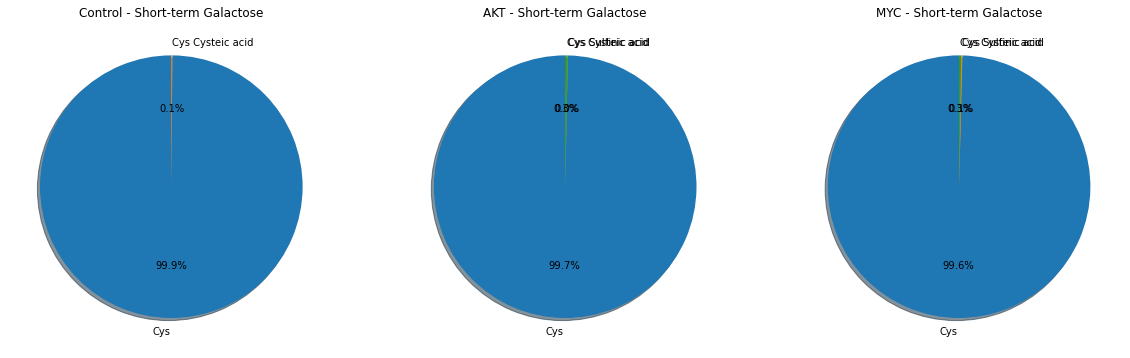

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
OA.cysteine_overview(Controlstrep, ax1)
OA.cysteine_overview(AKTstrep, ax2)
OA.cysteine_overview(MYCstrep, ax3)
plt.title("cysteine containing peptides")
ax1.set_title("Control - Short-term Galactose")
ax2.set_title("AKT - Short-term Galactose")
ax3.set_title("MYC - Short-term Galactose")
plt.show()

### 6) Control, AKT and MYC in long-term Galactose

In [61]:
print("The ratio of PSMs that contain an oxidative modification in the Control treatment subset: {}".format((Controlltrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the AKT treatment subset: {}".format((AKTltrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the MYC treatment subset: {}".format((MYCltrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the Control treatment subset: 3.7858787844745265 %
The ratio of PSMs that contain an oxidative modification in the AKT treatment subset: 2.099410837274915 %
The ratio of PSMs that contain an oxidative modification in the MYC treatment subset: 3.8436584550655684 %


In [62]:
modr_temp6 = pd.merge(mrAKTltrep, mrMYCltrep, on="Modification", suffixes=('_AKT', '_MYC'))
modr6 = pd.merge(modr_temp6, mrControlltrep, on="Modification")
modr6 = modr6.rename(columns={'Ratios' : 'Ratios_Control'})
modr6 = modr6.drop(modr6[(modr6['Ratios_MYC'] == 0) | (modr6['Ratios_AKT'] == 0) | (modr6['Ratios_Control'] == 0)].index)
modr6

,Modification,Ratios_AKT,Ratios_MYC,Ratios_Control
0,[6]Carboxymethyl[K],0.000304,0.000214,0.000177
1,[35]Oxidation[T],0.000205,0.000098,0.000172
2,[35]Oxidation[E],0.000058,0.000144,0.000125
3,[35]Oxidation[S],0.000246,0.000206,0.000379
4,[35]Oxidation[Q],0.000097,0.000087,0.000062
6,[35]Oxidation[I],0.000236,0.000439,0.000385
8,[35]Oxidation[W],0.006219,0.008056,0.018848
11,[35]Oxidation[V],0.000069,0.000108,0.000134
12,[35]Oxidation[R],0.000038,0.000026,0.000071
15,[35]Oxidation[F],0.000204,0.000506,0.000380


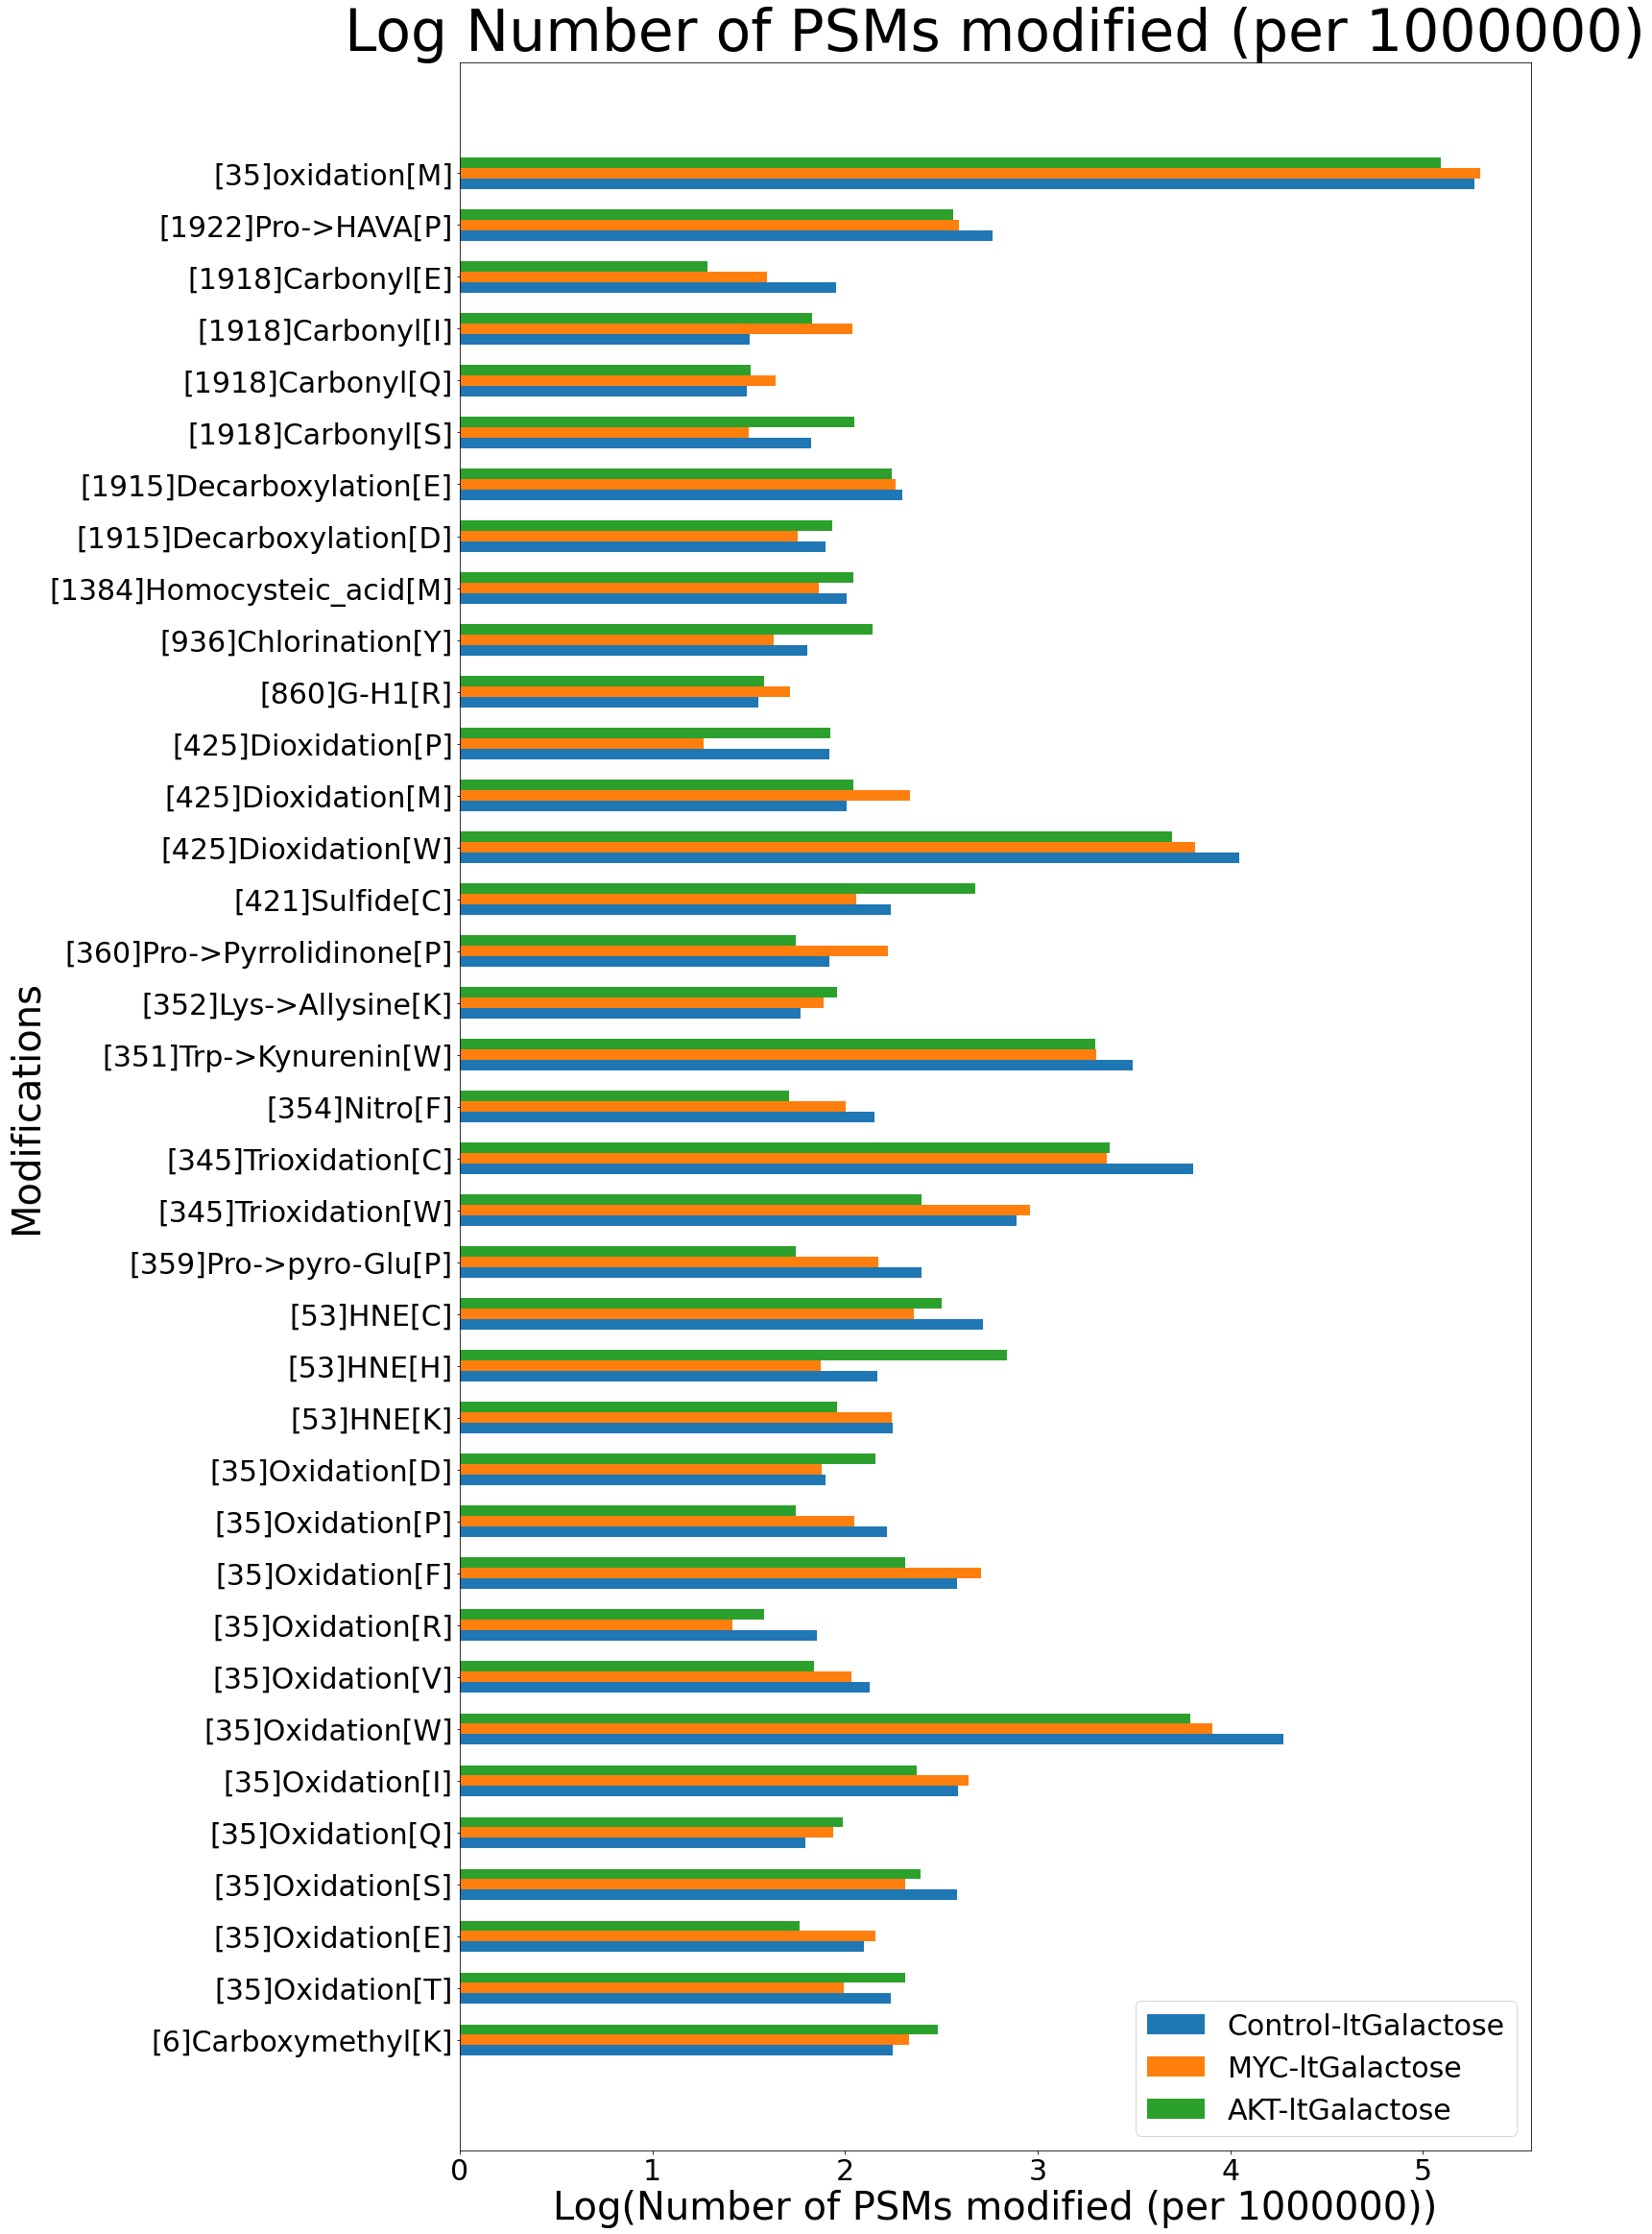

In [63]:
y = modr6["Modification"]
xGlu = np.log10(modr6['Ratios_Control']*1000000)
xstGal = np.log10(modr6['Ratios_MYC']*1000000)
xltGal = np.log10(modr6['Ratios_AKT']*1000000)
y_axis = np.arange(len(y))
plt.figure(figsize=(20,40))
plt.barh(y_axis - 0.2, xGlu, 0.2, label = 'Control-ltGalactose')
plt.barh(y_axis, xstGal, 0.2, label = 'MYC-ltGalactose')
plt.barh(y_axis + 0.2, xltGal, 0.2, label = 'AKT-ltGalactose')

plt.yticks(y_axis, y)
plt.ylabel("Modifications", fontsize = 40)
plt.xlabel("Log(Number of PSMs modified (per 1000000))", fontsize = 40)
plt.title("Log Number of PSMs modified (per 1000000)", fontsize = 60)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 30)
plt.show()

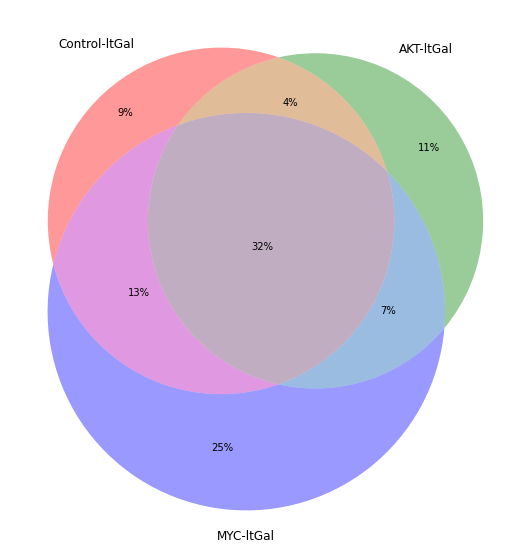

In [64]:
OA.condition_venn([Controlltrep,AKTltrep,MYCltrep], ["Control-ltGal", "AKT-ltGal", "MYC-ltGal"])

In [65]:
RPM6 = pd.merge(RPMControllt,RPMAKTlt, on="Amino acid", suffixes=('_Control','_AKT'))
RPM6 = pd.merge(RPM6, RPMMYClt, on="Amino acid")
RPM6 = RPM6.rename(columns={"Relative level of PSMs containing unmodified residue": "Relative level of PSMs containing unmodified residue_MYC"})
RPM6

,Amino acid,Relative level of PSMs containing unmodified residue_Control,Relative level of PSMs containing unmodified residue_AKT,Relative level of PSMs containing unmodified residue_MYC
0,A,0.998839,0.998834,0.999275
1,R,0.999134,0.999411,0.998970
2,N,0.996753,0.996789,0.996125
3,D,0.995605,0.994786,0.996246
4,C,0.041088,0.017335,0.025787
5,Q,0.994773,0.994040,0.994642
6,E,0.997410,0.997659,0.997563
7,G,0.999716,0.999726,0.999871
8,H,0.998562,0.998097,0.998434
9,I,0.999776,1.000000,0.999617


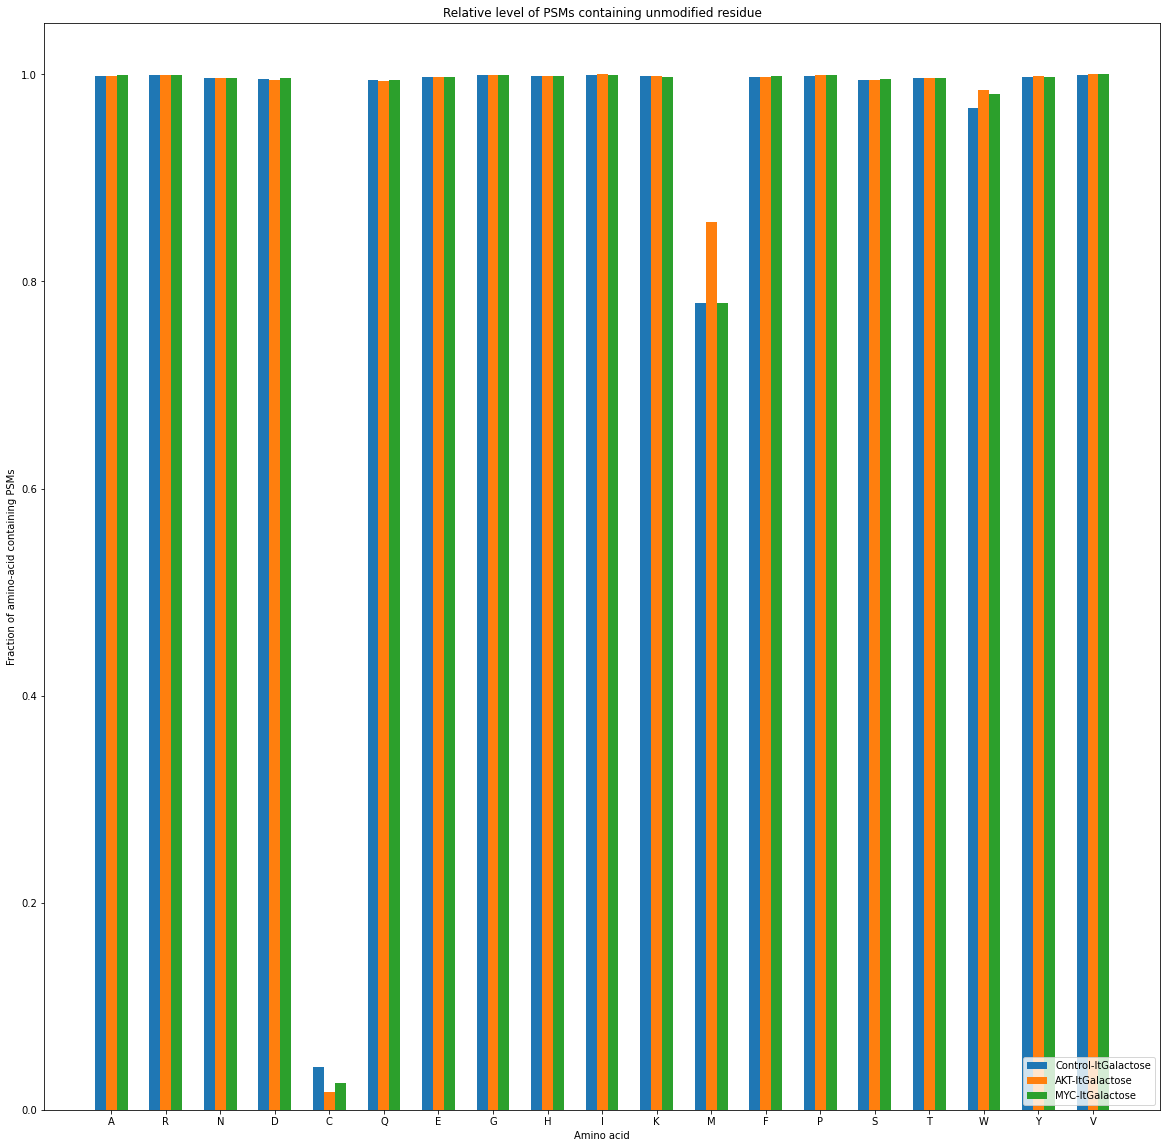

In [66]:
x = RPM6["Amino acid"]
xGlu = RPM6["Relative level of PSMs containing unmodified residue_Control"]
xst = RPM6['Relative level of PSMs containing unmodified residue_AKT']
xlt = RPM6['Relative level of PSMs containing unmodified residue_MYC']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xGlu, 0.2, label = 'Control-ltGalactose')
plt.bar(x_axis, xst, 0.2, label = 'AKT-ltGalactose')
plt.bar(x_axis + 0.2, xlt, 0.2, label = 'MYC-ltGalactose')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (20,20)
plt.legend(loc="lower right")
plt.show()

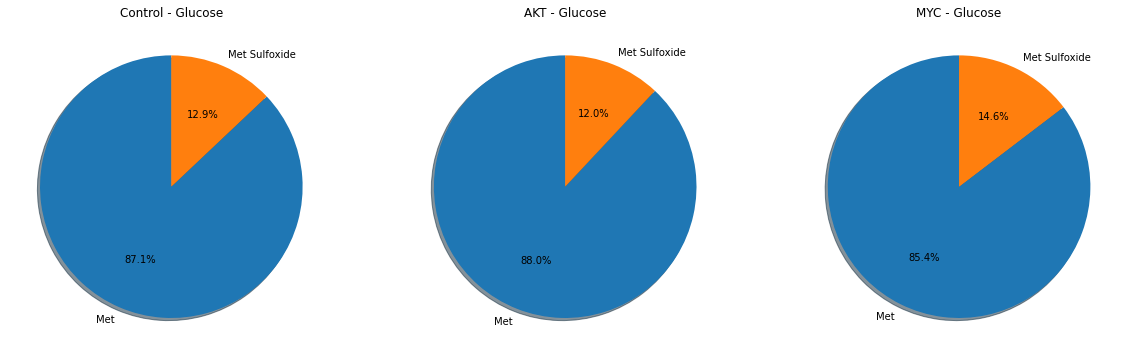

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
OA.methionine_overview(Controlrep, ax1)
OA.methionine_overview(AKTrep, ax2)
OA.methionine_overview(MYCrep, ax3)
plt.title("Methionine containing peptides")
ax1.set_title("Control - Glucose")
ax2.set_title("AKT - Glucose")
ax3.set_title("MYC - Glucose")
plt.show()

Contrast with short-term galactose!

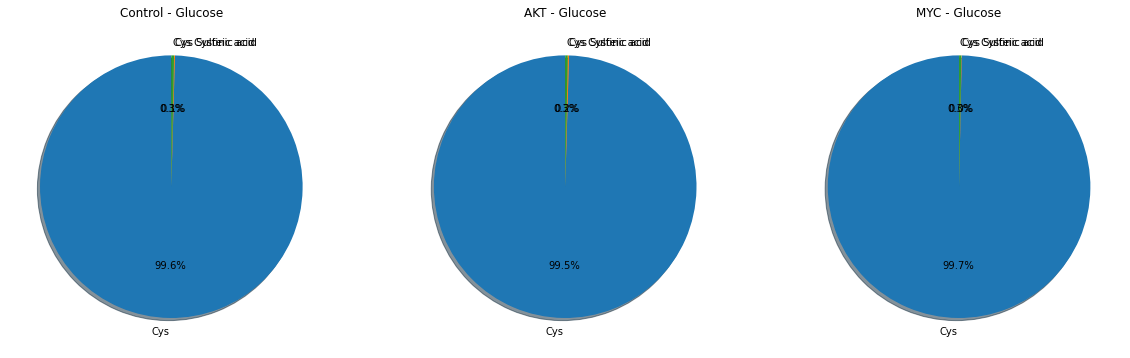

In [68]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
OA.cysteine_overview(Controlrep, ax1)
OA.cysteine_overview(AKTrep, ax2)
OA.cysteine_overview(MYCrep, ax3)
plt.title("Cysteine containing peptides")
ax1.set_title("Control - Glucose")
ax2.set_title("AKT - Glucose")
ax3.set_title("MYC - Glucose")
plt.show()

# Analysis with quant data

In [2]:
#quant = pd.read_csv("/home/robbe/ionbot/PXD015122/raw_files/QuantifiedPeptides.tsv", sep="\t")
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD015122/mzml_files/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type|Unnamed')), axis = 1, inplace = True)
quant.drop(["Protein Groups", "Gene Names", "Organism"], axis =1, inplace = True)